# Importing the Dataset

In [1]:
import pandas as pd

file_path = '/content/drive/MyDrive/Datasets/Spotify Dataset.csv'

df = pd.read_csv(file_path)

df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [2]:
df.shape

(114000, 21)

In [3]:
columns_to_drop = ['Unnamed: 0', 'track_id']
df_prim = df.drop(columns=columns_to_drop)
df_prim.head()

artists                                         album_name  \
0             Gen Hoshino                                             Comedy   
1            Ben Woodward                                   Ghost (Acoustic)   
2  Ingrid Michaelson;ZAYN                                     To Begin Again   
3            Kina Grannis  Crazy Rich Asians (Original Motion Picture Sou...   
4        Chord Overstreet                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

In [4]:
df_prim.shape

(114000, 19)

In [5]:
df_prim.isnull().sum().sort_values(ascending=False)

artists             1
track_name          1
album_name          1
speechiness         0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
loudness            0
mode                0
key                 0
energy              0
danceability        0
explicit            0
duration_ms         0
popularity          0
track_genre         0
dtype: int64

In [6]:
df_prim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

In [7]:
df_cleaned = df_prim.dropna(subset=['track_name', 'album_name', 'artists'])
print(df_cleaned.isnull().sum().sort_values(ascending=False))
print(df_cleaned.shape)

artists             0
mode                0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
loudness            0
album_name          0
key                 0
energy              0
danceability        0
explicit            0
duration_ms         0
popularity          0
track_name          0
track_genre         0
dtype: int64
(113999, 19)


In [8]:
df_cleaned.describe()

popularity   duration_ms   danceability         energy  \
count  113999.000000  1.139990e+05  113999.000000  113999.000000   
mean       33.238827  2.280312e+05       0.566801       0.641383   
std        22.304959  1.072961e+05       0.173543       0.251530   
min         0.000000  8.586000e+03       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean        5.309126      -8.258950       0.637558       0.084652   
std         3.559999       5.029357       0.480708       0.105733   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  113999.000000     113999.000000  113999.000000  113999.000000   
mean        0.314907          0.156051       0.213554       0.474066   
std         0.332522          0.309556       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.597500          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  113999.000000   113999.000000  
mean      122.147695        3.904034  
std        29.978290        0.432623  
min         0.000000        0.000000  
25%        99.218500        4.000000  
50%       122.017000        4.000000  
75%       140.071000        4.000000  
max       243.372000        5.000000

In [9]:
df_cleaned.nunique()

artists             31437
album_name          46579
track_name          73602
popularity            101
duration_ms         50696
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45652
time_signature          5
track_genre           114
dtype: int64

In [10]:
print('Uniqe values for explicit = ', df_cleaned['explicit'].unique())
print('Uniqe values for key = ', df_cleaned['key'].unique())
print('Uniqe values for mode = ', df_cleaned['mode'].unique())
print('Uniqe values for time_signature = ', df_cleaned['time_signature'].unique())

Uniqe values for explicit =  [False  True]
Uniqe values for key =  [ 1  0  2  6 11  8  4  7  3 10  5  9]
Uniqe values for mode =  [0 1]
Uniqe values for time_signature =  [4 3 1 5 0]


In [11]:
print('Uniqe values for track_genre = ', df_cleaned['track_genre'].unique())

Uniqe values for track_genre =  ['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 's

In [12]:
df_cleaned['track_genre'].value_counts().sort_values(ascending=False)

track_genre
acoustic       1000
dubstep        1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
k-pop           999
Name: count, Length: 114, dtype: int64

# Basic EDAs

Top 10 Artists:
 artists
The Beatles              279
George Jones             271
Stevie Wonder            236
Linkin Park              224
Ella Fitzgerald          222
Prateek Kuhad            217
Feid                     202
Chuck Berry              190
Håkan Hellström          183
OneRepublic              181
The Beach Boys           176
my little airport        171
Elvis Presley            169
Charlie Brown Jr.        169
Red Hot Chili Peppers    159
Bryan Adams              157
Scooter                  155
Daddy Yankee             154
Arctic Monkeys           152
BTS                      151
Name: count, dtype: int64


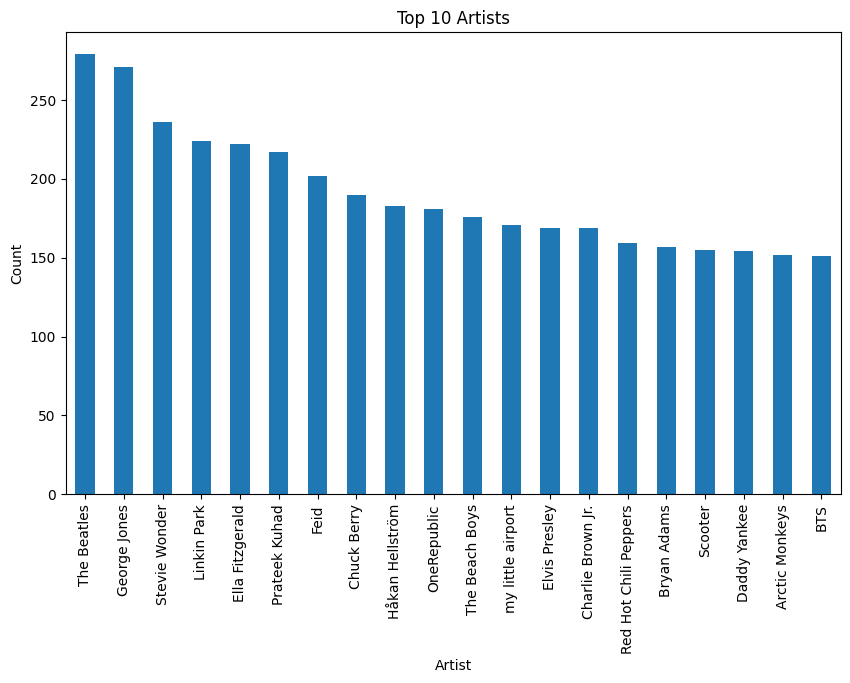

In [13]:
# Top 10 artists
top_artists = df_cleaned['artists'].value_counts().head(20)
print("Top 10 Artists:\n", top_artists)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar')
plt.title('Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.show()

Top 10 Albums:
 album_name
Alternative Christmas 2022              195
Feliz Cumpleaños con Perreo             184
Metal                                   143
Halloween con perreito                  123
Halloween Party 2022                    115
The Complete Hank Williams              111
Fiesta portatil                         110
Frescura y Perreo                       106
Esto me suena a Farra                   105
Perreo en Halloween                     103
On air 70's Hits                        102
Queda poco para la PAES 2.0             101
Reggeaton Imperdible                     98
Homecoming Latin Party                   95
Halloween Metal Nights                   95
El perreo es el futuro                   94
Greatest Hits                            93
Arbeitsmusik Herbst/Winter 2022/2023     93
Hans Zimmer: Epic Scores                 91
EDM Gaming Music Autumn/Winter 2022      90
Name: count, dtype: int64


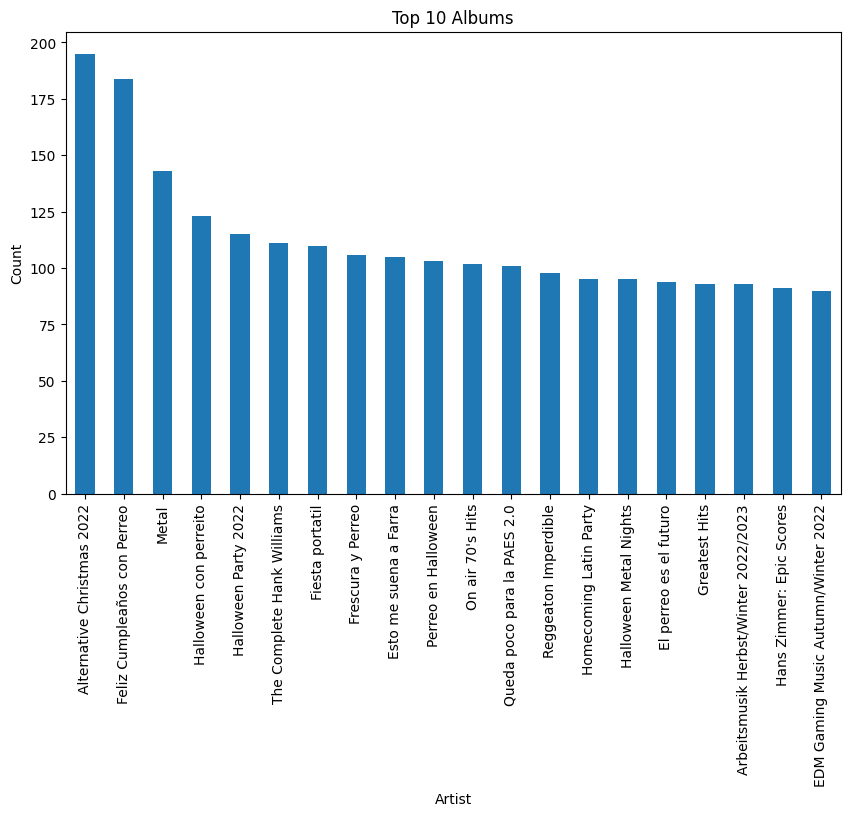

In [14]:
# Top 10 albums
top_albums = df_cleaned['album_name'].value_counts().head(20)
print("Top 10 Albums:\n", top_albums)

plt.figure(figsize=(10, 6))
top_albums.plot(kind='bar')
plt.title('Top 10 Albums')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.show()

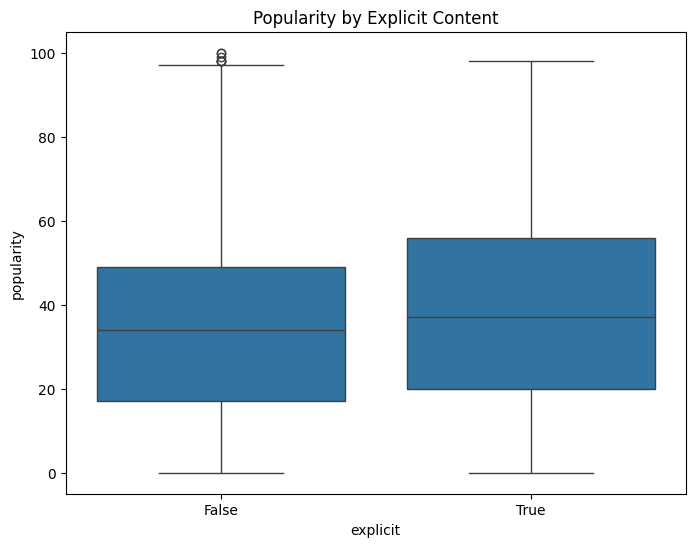

In [13]:
# Popularity by explicit content
plt.figure(figsize=(8, 6))
sns.boxplot(x='explicit', y='popularity', data=df_cleaned)  #explicite used are more popular songs
plt.title('Popularity by Explicit Content')
plt.show()

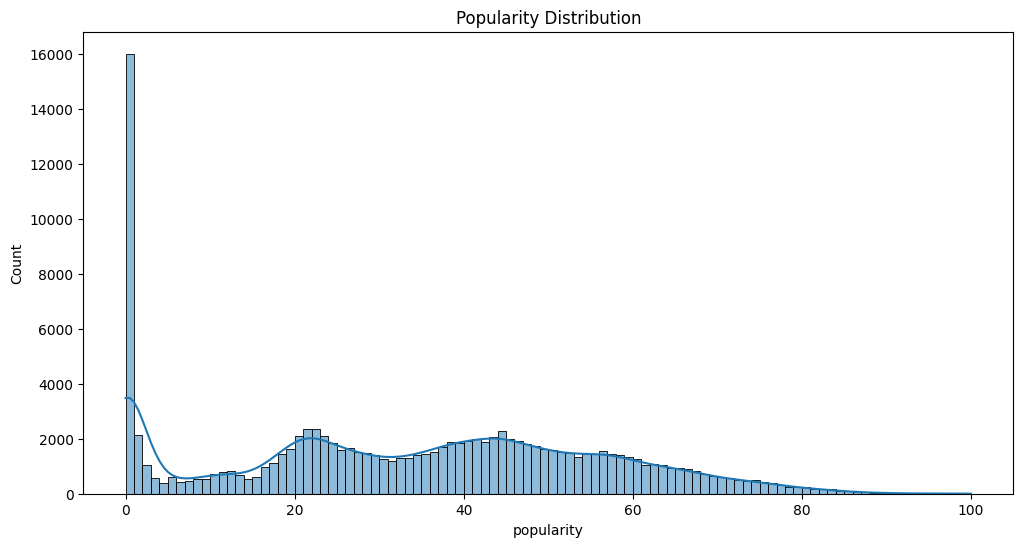

In [14]:
# Distribution of Popularity
plt.figure(figsize=(12, 6))
sns.histplot(x='popularity', bins=100, data=df_cleaned, kde=True)
plt.title('Popularity Distribution')
plt.show()

In [15]:
df_cleaned = df_cleaned[df_cleaned['popularity'] != 0]

# Check the DataFrame to confirm rows are deleted
print(df_cleaned.head())
print("Number of rows after deletion:", df_cleaned.shape[0])

                  artists                                         album_name  \
0             Gen Hoshino                                             Comedy   
1            Ben Woodward                                   Ghost (Acoustic)   
2  Ingrid Michaelson;ZAYN                                     To Begin Again   
3            Kina Grannis  Crazy Rich Asians (Original Motion Picture Sou...   
4        Chord Overstreet                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97980 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           97980 non-null  object 
 1   album_name        97980 non-null  object 
 2   track_name        97980 non-null  object 
 3   popularity        97980 non-null  int64  
 4   duration_ms       97980 non-null  int64  
 5   explicit          97980 non-null  bool   
 6   danceability      97980 non-null  float64
 7   energy            97980 non-null  float64
 8   key               97980 non-null  int64  
 9   loudness          97980 non-null  float64
 10  mode              97980 non-null  int64  
 11  speechiness       97980 non-null  float64
 12  acousticness      97980 non-null  float64
 13  instrumentalness  97980 non-null  float64
 14  liveness          97980 non-null  float64
 15  valence           97980 non-null  float64
 16  tempo             97980 non-null  float64
 1

In [17]:
df_cleaned.isnull().sum().sort_values(ascending=False)

artists             0
mode                0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
loudness            0
album_name          0
key                 0
energy              0
danceability        0
explicit            0
duration_ms         0
popularity          0
track_name          0
track_genre         0
dtype: int64

In [18]:
df_cleaned['popularity'].describe()

count    97980.000000
mean        38.673127
std         19.201246
min          1.000000
25%         23.000000
50%         39.000000
75%         53.000000
max        100.000000
Name: popularity, dtype: float64

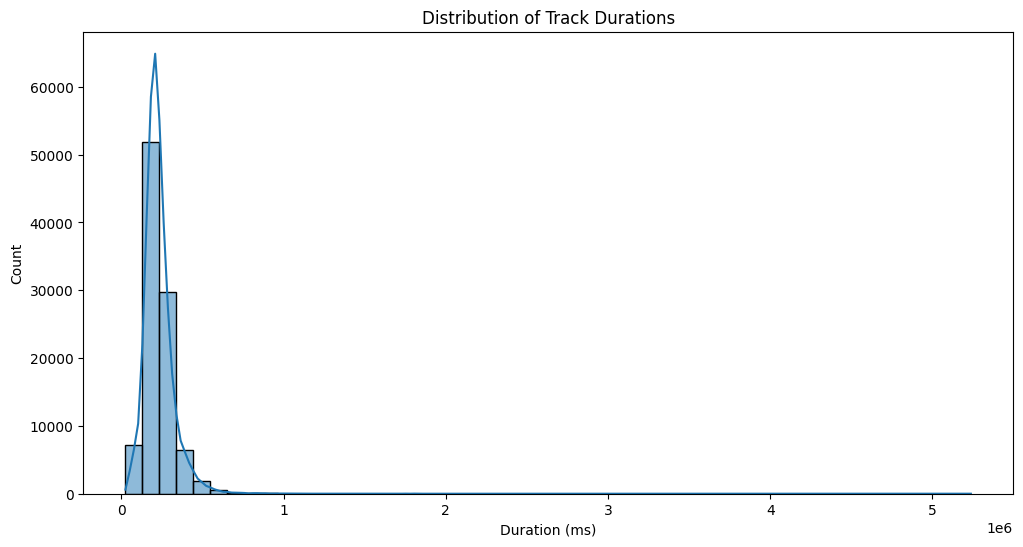

In [19]:
# Distribution of track durations
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['duration_ms'], bins=50, kde=True)  #few tracks are there which are of longer duration
plt.title('Distribution of Track Durations')
plt.xlabel('Duration (ms)')
plt.show()

Text(0.5, 1.0, 'Distribution of Danceability')

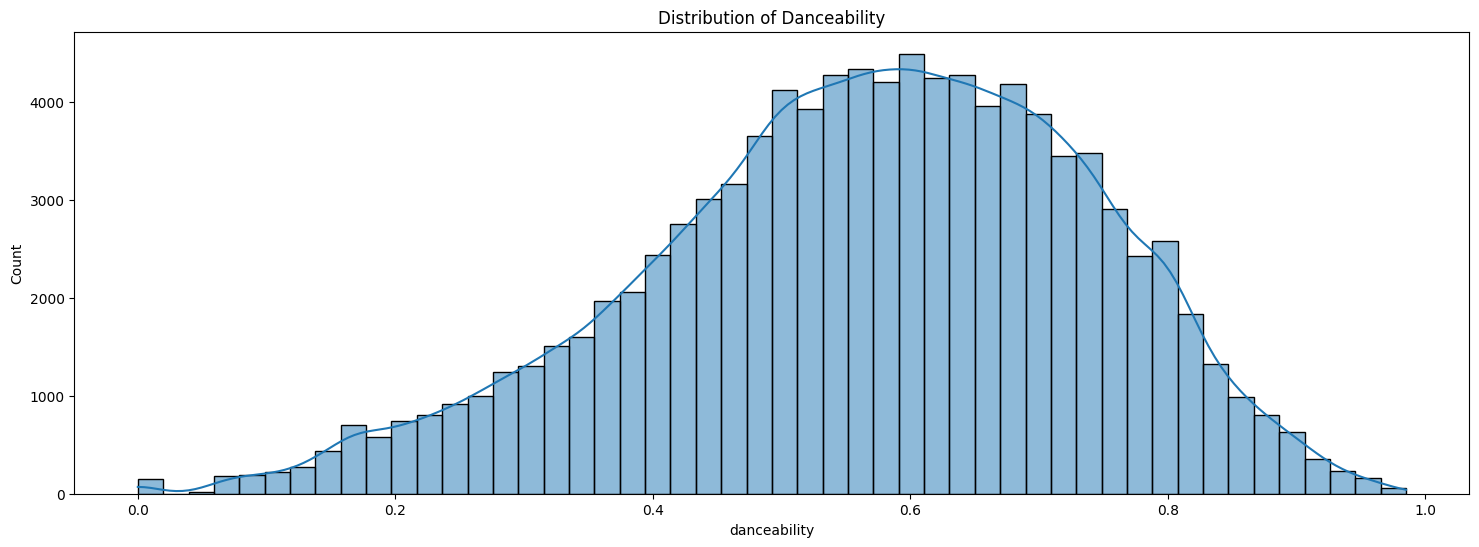

In [96]:
# Distribution of danceability, energy, and valence
plt.figure(figsize=(18, 6))
sns.histplot(df_cleaned['danceability'], bins=50, kde=True)
plt.title('Distribution of Danceability')

Text(0.5, 1.0, 'Distribution of Energy')

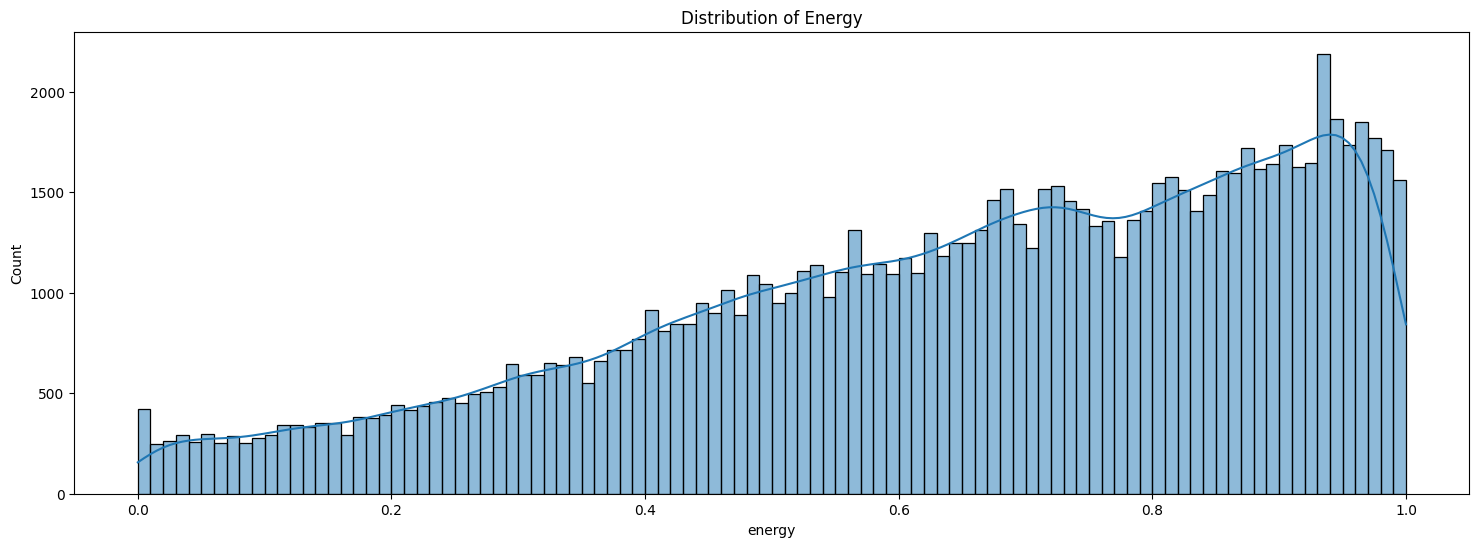

In [97]:
# Distribution of Energy
plt.figure(figsize=(18, 6))
sns.histplot(df_cleaned['energy'], bins=100, kde=True)
plt.title('Distribution of Energy')

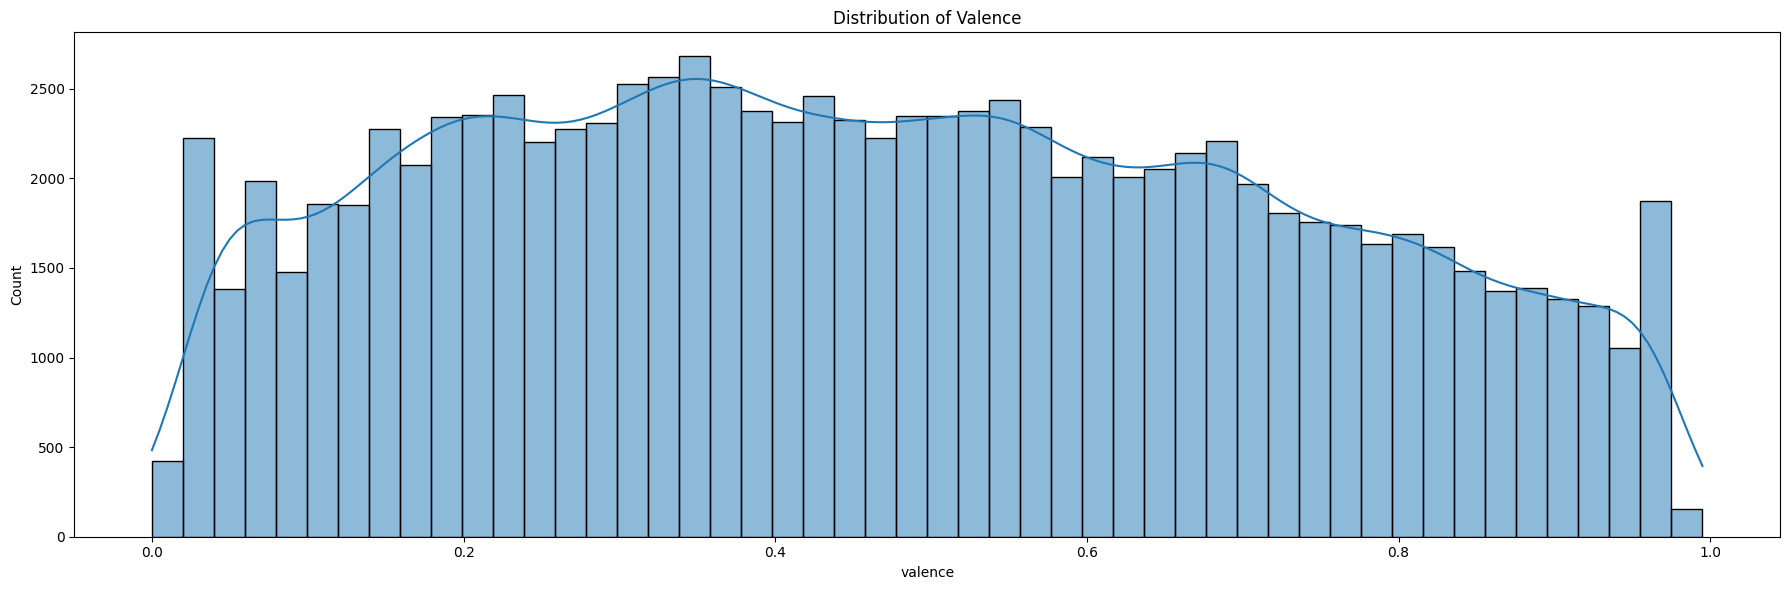

In [98]:
# Distribution of Valence
plt.figure(figsize=(18, 6))
sns.histplot(df_cleaned['valence'], bins=50, kde=True)
plt.title('Distribution of Valence')
plt.tight_layout()
plt.show()

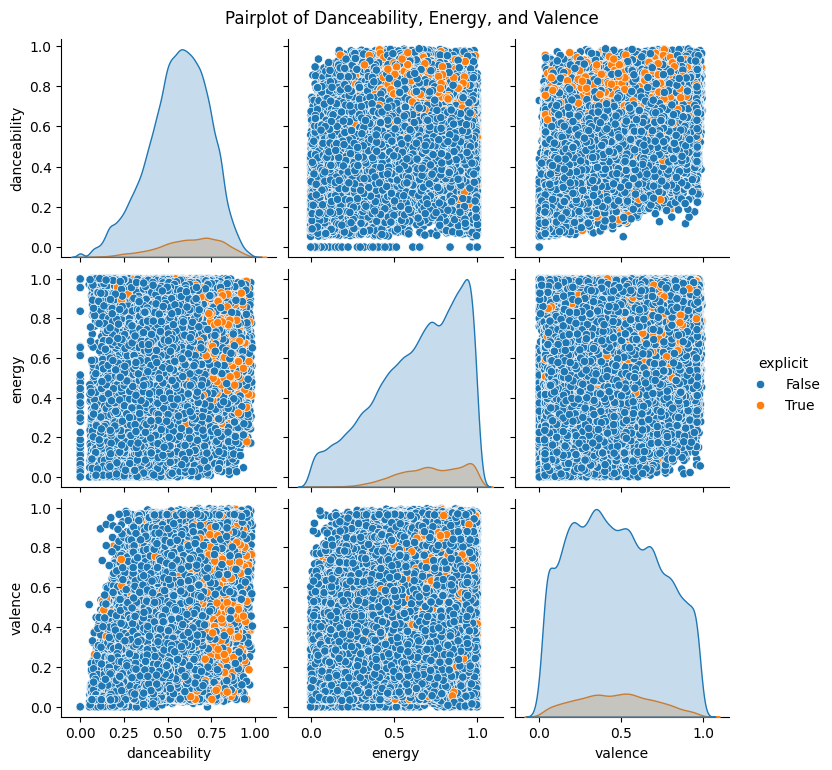

In [99]:
# Relationship between danceability, energy, and valence
sns.pairplot(df_cleaned, vars=['danceability', 'energy', 'valence'], hue='explicit', height=2.5)
plt.suptitle('Pairplot of Danceability, Energy, and Valence', y=1.02)
plt.show()

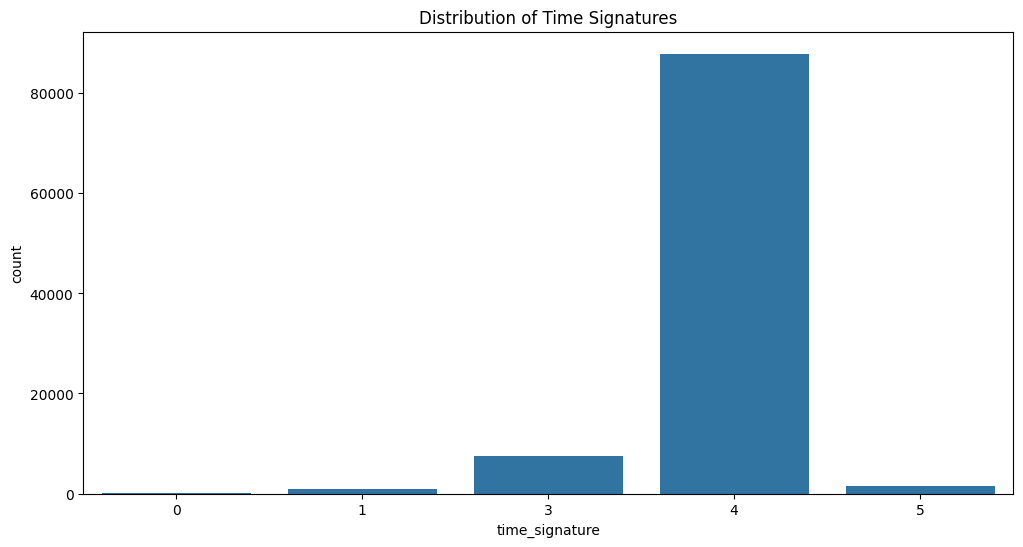

In [100]:
# Distribution of time signatures
plt.figure(figsize=(12, 6))
sns.countplot(x='time_signature', data=df_cleaned)
plt.title('Distribution of Time Signatures')
plt.show()

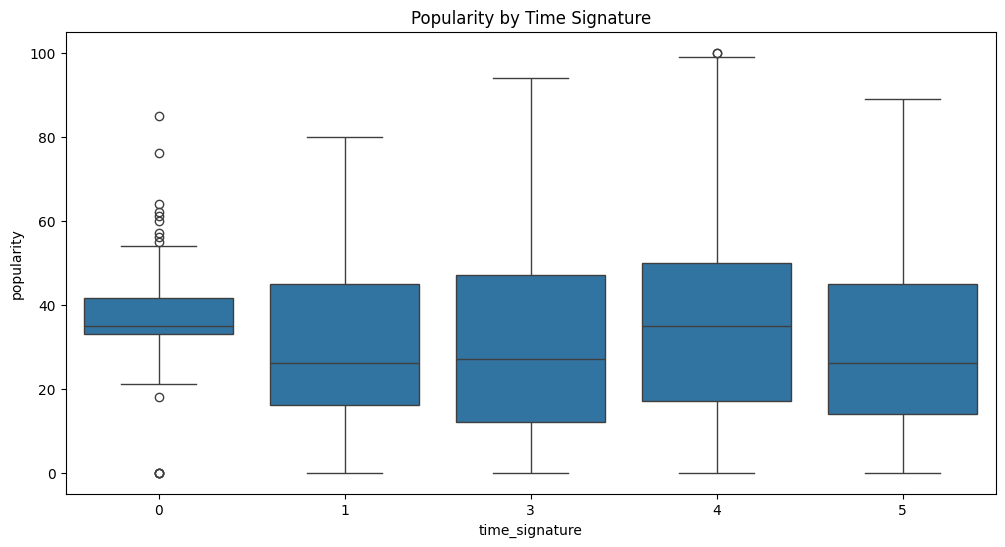

In [101]:
# Popularity by time signature
plt.figure(figsize=(12, 6))
sns.boxplot(x='time_signature', y='popularity', data=df)
plt.title('Popularity by Time Signature')
plt.show()

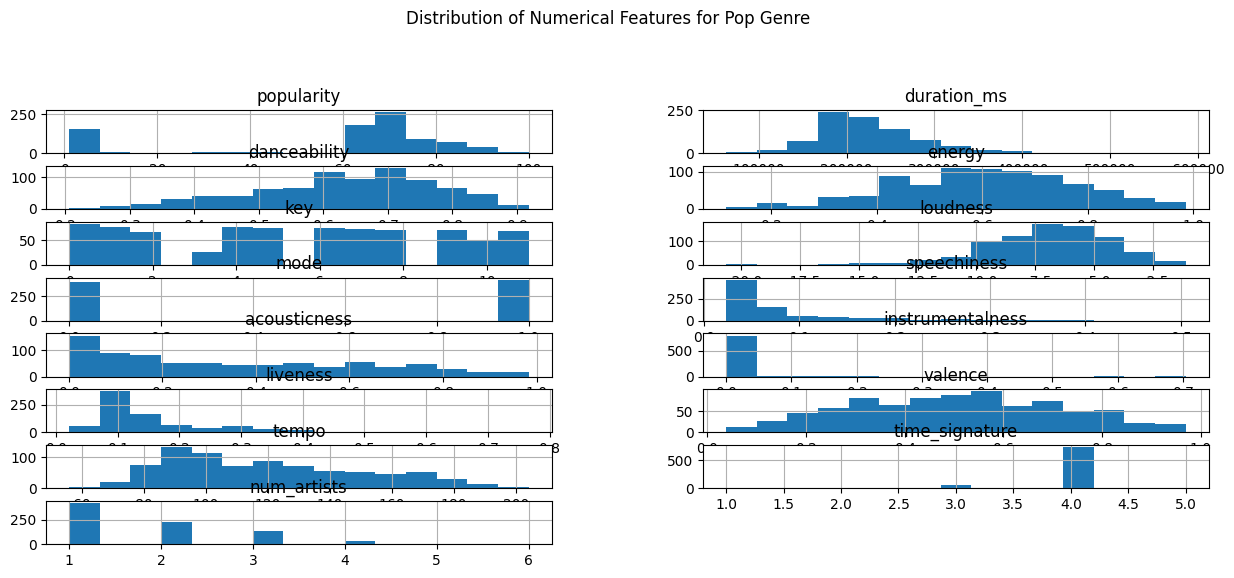

In [102]:
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
# Filter for a specific genre, e.g., 'pop'
pop_tracks = df_cleaned[df_cleaned['track_genre'] == 'pop']

# Distribution of numerical features for pop genre
pop_tracks[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(14, 2))
plt.suptitle('Distribution of Numerical Features for Pop Genre')
plt.show()

<Figure size 1500x600 with 0 Axes>

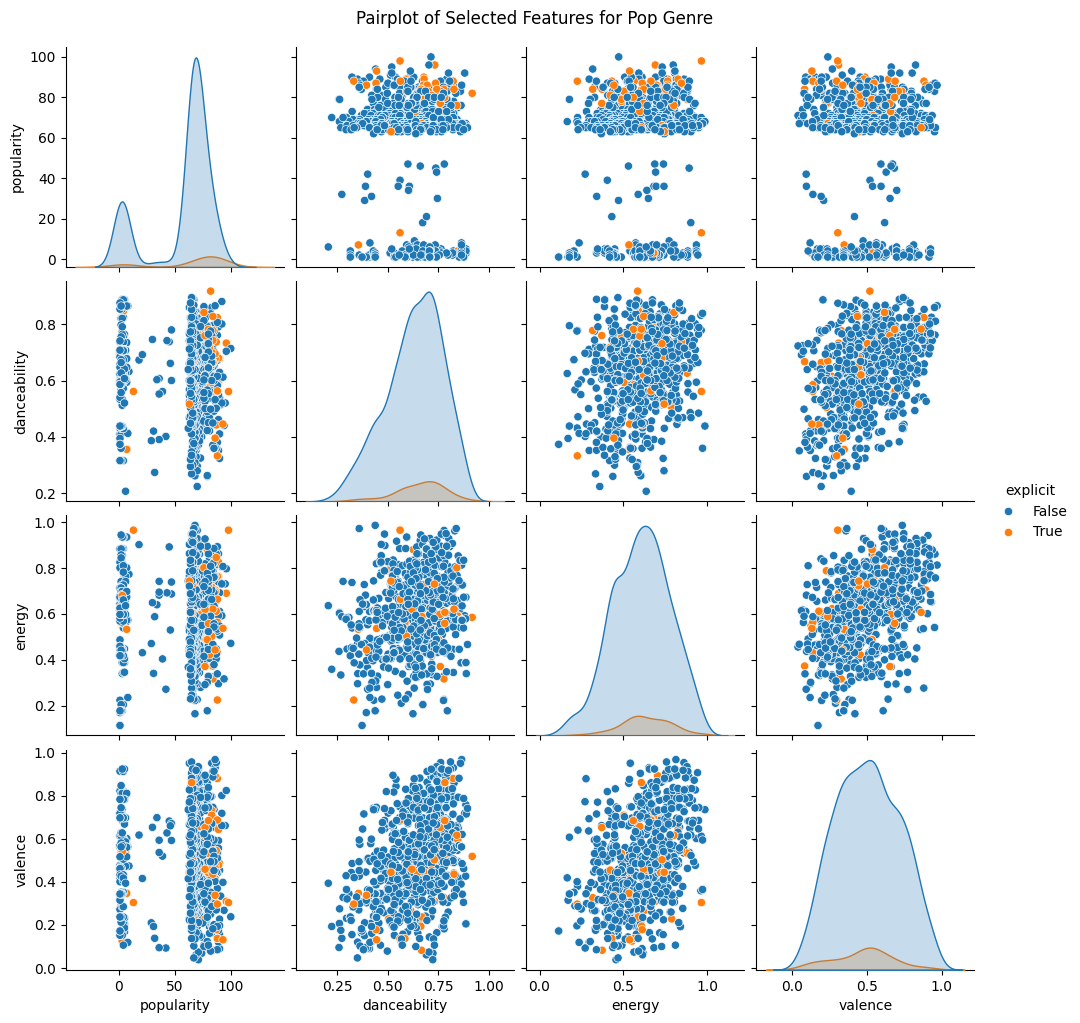

In [103]:
# Popularity vs. other features for pop genre
plt.figure(figsize=(15, 6))
sns.pairplot(pop_tracks, vars=['popularity', 'danceability', 'energy', 'valence'], hue='explicit', height=2.5)
plt.suptitle('Pairplot of Selected Features for Pop Genre', y=1.02)
plt.show()

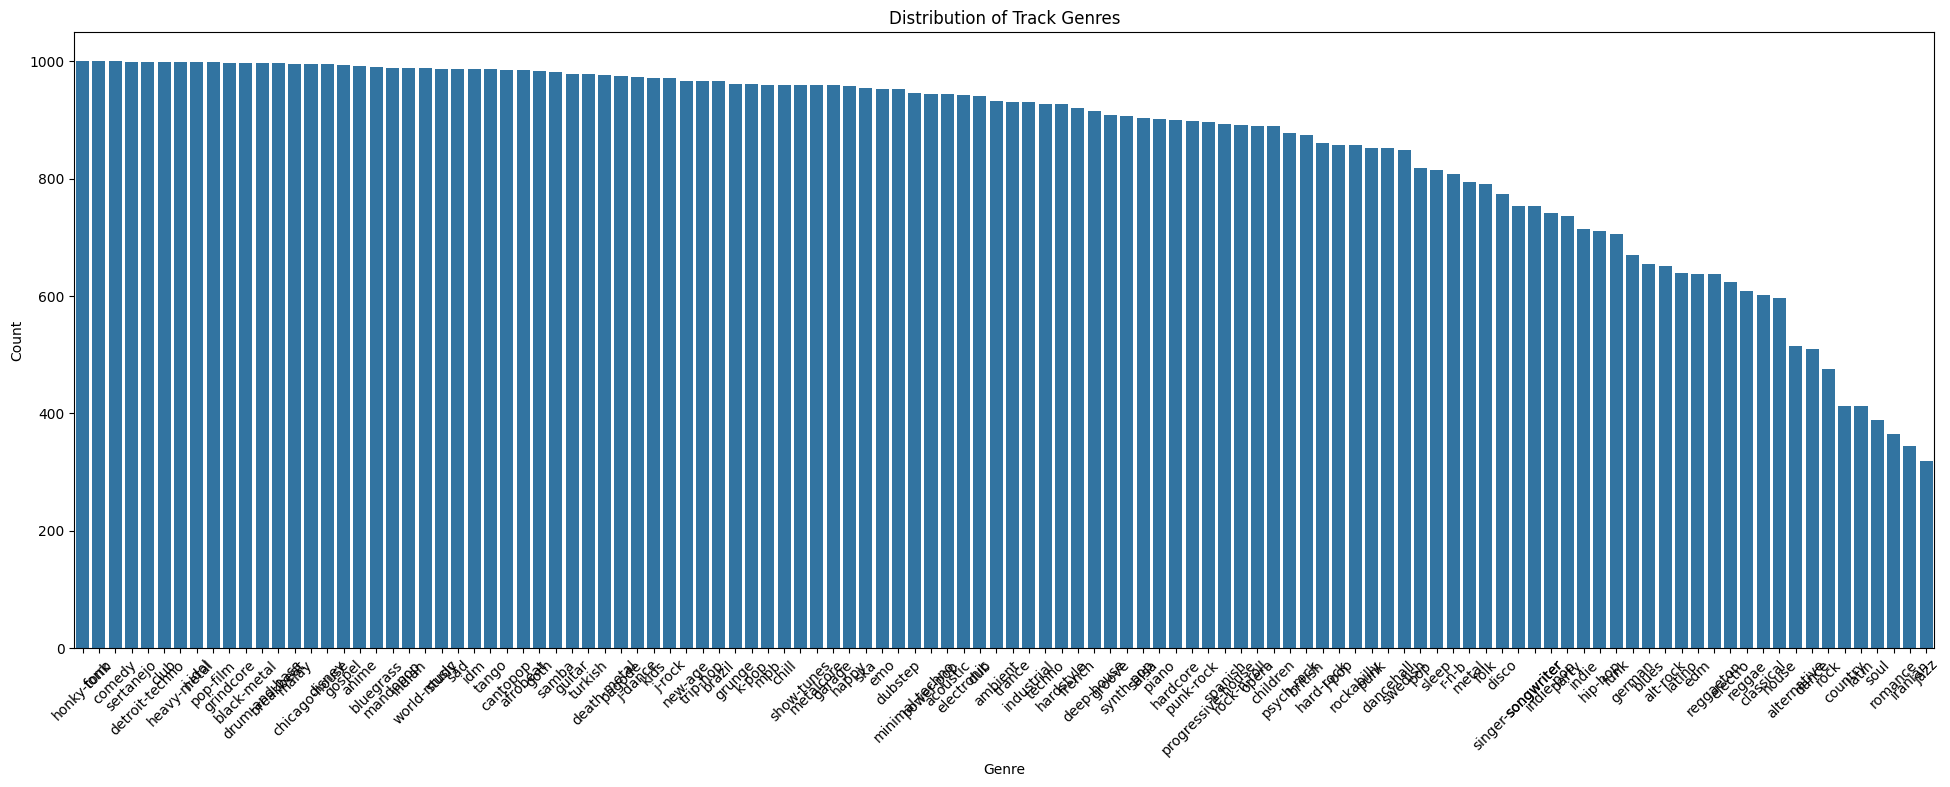

In [20]:
plt.figure(figsize=(24, 8))
sns.countplot(x='track_genre', data=df_cleaned, order=df_cleaned['track_genre'].value_counts().index)
plt.title('Distribution of Track Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

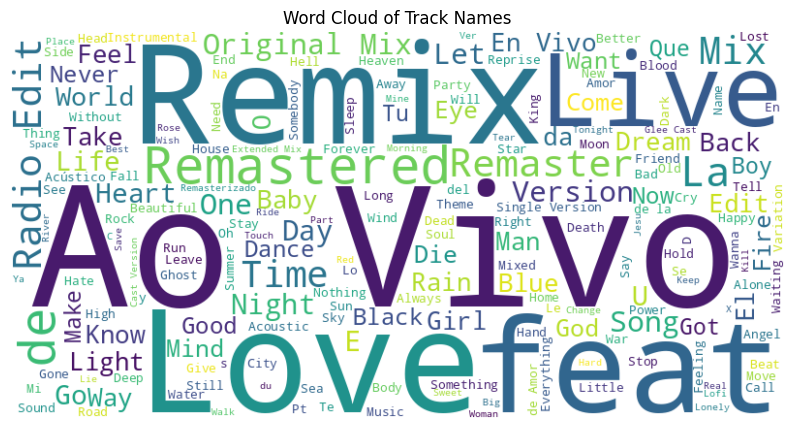

In [21]:
from wordcloud import WordCloud

# Generate a word cloud for track names
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_cleaned['track_name']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Track Names')
plt.show()

# Feature Engineering

### Adding **'num_artists'**

In [22]:
df_cleaned['num_artists'] = df_cleaned['artists'].apply(lambda x: len(x.split(';')))
df_cleaned1 = df_cleaned.drop(columns=['artists'], axis=1)
df_cleaned1.head()

album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  \
0          0.000001    0.3580    0.715   87.917               4    acoustic   
1          0.000006    0.1010    0.267   77.489               4    acoustic   
2          0.000000    0.1170    0.120   76.332               4    acoustic   
3          0.000071    0.1320    0.143  181.740               3    acoustic   
4          0.000000    0.0829    0.167  119.949               4    acoustic   

   num_artists  
0            1  
1            1  
2            2  
3            1  
4            1

In [23]:
df_cleaned1.isnull().sum().sort_values(ascending=False)

album_name          0
speechiness         0
track_genre         0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
mode                0
track_name          0
loudness            0
key                 0
energy              0
danceability        0
explicit            0
duration_ms         0
popularity          0
num_artists         0
dtype: int64

In [24]:
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97980 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   album_name        97980 non-null  object 
 1   track_name        97980 non-null  object 
 2   popularity        97980 non-null  int64  
 3   duration_ms       97980 non-null  int64  
 4   explicit          97980 non-null  bool   
 5   danceability      97980 non-null  float64
 6   energy            97980 non-null  float64
 7   key               97980 non-null  int64  
 8   loudness          97980 non-null  float64
 9   mode              97980 non-null  int64  
 10  speechiness       97980 non-null  float64
 11  acousticness      97980 non-null  float64
 12  instrumentalness  97980 non-null  float64
 13  liveness          97980 non-null  float64
 14  valence           97980 non-null  float64
 15  tempo             97980 non-null  float64
 16  time_signature    97980 non-null  int64  
 1

97980
num_artists
1     72701
2     17760
3      5231
4      1418
5       440
6       186
7       101
8        46
10       20
9        19
11       13
12        8
18        6
17        5
13        5
14        4
15        4
23        3
19        2
30        2
31        1
26        1
20        1
22        1
32        1
38        1
Name: count, dtype: int64


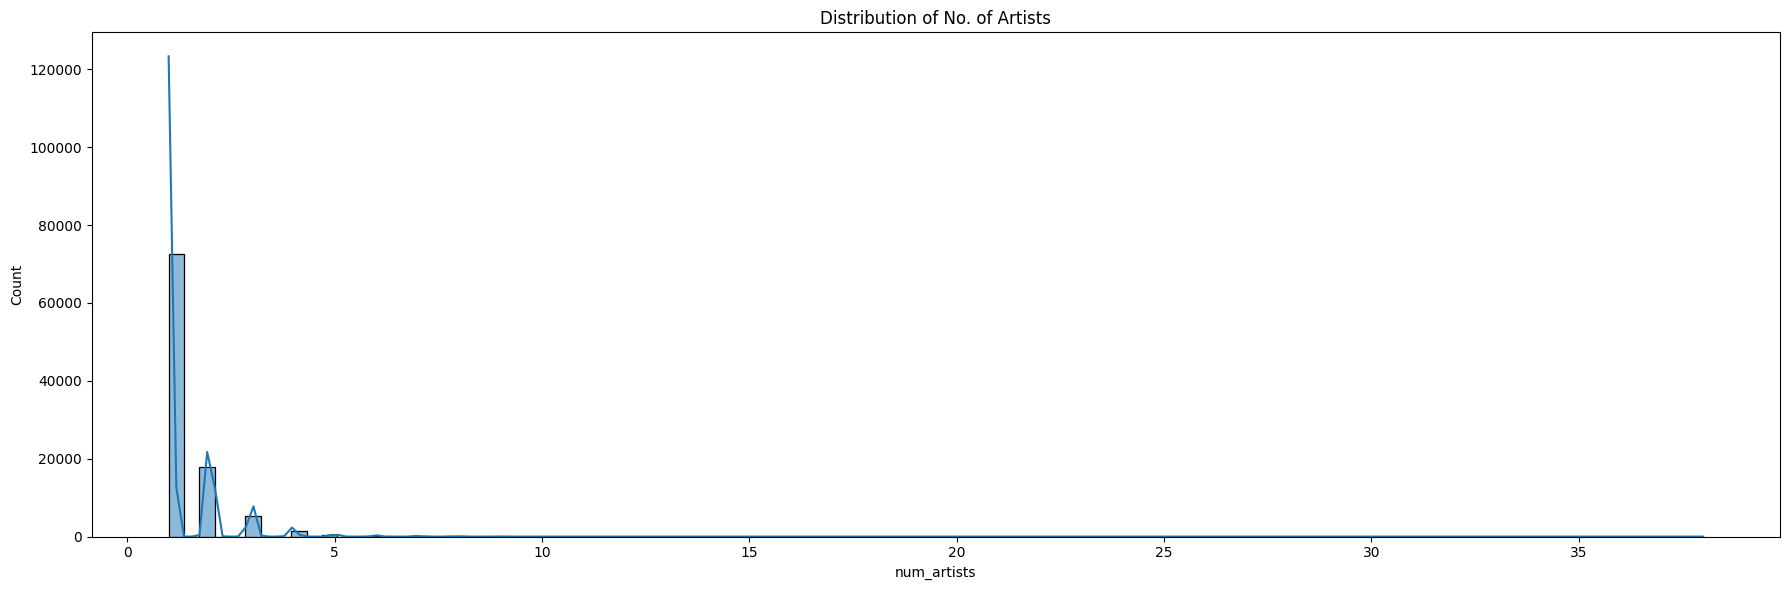

In [25]:
print(df_cleaned1['num_artists'].value_counts().sum())
print(df_cleaned1['num_artists'].value_counts())

plt.figure(figsize=(18, 6))
sns.histplot(df_cleaned['num_artists'], bins=100, kde=True)
plt.title('Distribution of No. of Artists')
plt.tight_layout()
plt.show()

### Adding Most Frequent Wrods from 'track_name'

In [26]:
! pip install nltk

In [27]:
import nltk

# Download the 'punkt' resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
import re
from nltk.tokenize import word_tokenize
from collections import Counter

# Function to clean text and remove non-alphabetic characters
def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only alphabets and whitespaces
    return cleaned_text.strip()  # Strip leading and trailing whitespaces

# Concatenate all cleaned track names into a single string
all_track_names_cleaned = ' '.join(df_cleaned1['track_name'].dropna().apply(clean_text))

# Tokenize the cleaned string into words using simple whitespace splitting
tokens = all_track_names_cleaned.split()

# Filter tokens to include only those that start with a capital letter
capitalized_tokens = [word for word in tokens if word[0].isupper()]

# Count the frequency of each capitalized word
capitalized_word_freq = Counter(capitalized_tokens)

# Get the top 20 most frequent capitalized words
top_9_capitalized_words = capitalized_word_freq.most_common(9)

top_9_capitalized_words

[('The', 5005),
 ('You', 3306),
 ('Vivo', 2951),
 ('Ao', 2863),
 ('Me', 2851),
 ('I', 2546),
 ('Remix', 2342),
 ('Love', 2007),
 ('A', 1887)]

In [29]:
top_9_words = [word for word, freq in top_9_capitalized_words]

# Function to classify words into top 9 or 'Others'
def classify_words(text):
    cleaned_text = clean_text(text)
    tokens = cleaned_text.split()
    word_classes = {word: 0 for word in top_9_words}
    word_classes['Others'] = 0
    for word in tokens:
        if word in top_9_words:
            word_classes[word] = 1
        else:
            word_classes['Others'] = 1
    return word_classes

# Apply the classification function and create new columns
classified_data = df_cleaned1['track_name'].dropna().apply(classify_words)
classified_df = pd.DataFrame(classified_data.tolist())

# Join the classified columns with the original dataframe
df_cleaned2 = df_cleaned1.join(classified_df.fillna(0))

# Display the DataFrame with the new columns
print(df_cleaned2.head())

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  ...  The  You  Vivo   Ao   Me  \
0         0.676  0.4610    1    -6.746     0  ...  0.0  0.0   0.0  0.0  0.0   
1         0.420  0.1660    1   -17.235     1  ...  0.0  0.0   0.0  0.0  0.0   
2         0.438  

In [30]:
df_cleaned2.head()

album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  ...  The  You  Vivo   Ao   Me  \
0         0.676  0.4610    1    -6.746     0  ...  0.0  0.0   0.0  0.0  0.0   
1         0.420  0.1660    1   -17.235     1  ...  0.0  0.0   0.0  0.0  0.0   
2         0.438  0.3590    0    -9.734     1  ...  0.0  0.0   0.0  0.0  0.0   
3         0.266  0.0596    0   -18.515     1  ...  0.0  0.0   0.0  0.0  0.0   
4         0.618  0.4430    2    -9.681     1  ...  0.0  0.0   0.0  0.0  0.0   

     I  Remix Love    A  Others  
0  0.0    0.0  0.0  0.0     1.0  
1  0.0    0.0  0.0  0.0     1.0  
2  0.0    0.0  0.0  0.0     1.0  
3  0.0    0.0  1.0  0.0     1.0  
4  0.0    0.0  0.0  0.0     1.0  

[5 rows x 29 columns]

### Adding Most Frequent Words from 'album_name'

In [31]:
# Concatenate all cleaned album names into a single string
all_album_names_cleaned = ' '.join(df_cleaned1['album_name'].dropna().apply(clean_text))

# Tokenize the cleaned string into words using simple whitespace splitting
tokens = all_album_names_cleaned.split()

# Filter tokens to include only those that start with a capital letter
capitalized_tokens = [word for word in tokens if word[0].isupper()]

# Count the frequency of each capitalized word
capitalized_word_freq = Counter(capitalized_tokens)

# Get the top 20 most frequent capitalized words
top_9_capitalized_words = capitalized_word_freq.most_common(9)

top_9_capitalized_words

[('The', 8348),
 ('Vivo', 3070),
 ('Original', 2853),
 ('Ao', 2842),
 ('Vol', 2510),
 ('Soundtrack', 2308),
 ('Edition', 1988),
 ('A', 1922),
 ('Motion', 1904)]

In [32]:
top_9_album_words = [word for word, freq in top_9_capitalized_words]

# Apply the classification function and create new columns
classified_data = df_cleaned2['album_name'].dropna().apply(classify_words)
classified_df = pd.DataFrame(classified_data.tolist())

# Join the classified columns with the original dataframe
df_cleaned3 = df_cleaned2.join(classified_df.fillna(0), lsuffix='_track', rsuffix='_album')

# Display the DataFrame with the new columns
print(df_cleaned3.head())

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  ...  The_album  You_album  \
0         0.676  0.4610    1    -6.746     0  ...        0.0        0.0   
1         0.420  0.1660    1   -17.235     1  ...        0.0        0.0   
2         0.438  0.3590    0 

In [33]:
print(df_cleaned3.isnull().sum().sort_values(ascending=False))
print(df_cleaned3.shape)

The_track           14058
The_album           14058
Ao_track            14058
Me_track            14058
I_track             14058
Remix_track         14058
Love_track          14058
A_track             14058
Others_track        14058
You_album           14058
You_track           14058
Vivo_album          14058
Ao_album            14058
Me_album            14058
I_album             14058
Remix_album         14058
Love_album          14058
A_album             14058
Vivo_track          14058
Others_album        14058
track_name              0
mode                    0
popularity              0
duration_ms             0
explicit                0
danceability            0
energy                  0
key                     0
loudness                0
speechiness             0
num_artists             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
track_genre             0
album_name  

In [34]:
null_columns = df_cleaned3.columns[df_cleaned3.isnull().any()].tolist()
print(null_columns)

['The_track', 'You_track', 'Vivo_track', 'Ao_track', 'Me_track', 'I_track', 'Remix_track', 'Love_track', 'A_track', 'Others_track', 'The_album', 'You_album', 'Vivo_album', 'Ao_album', 'Me_album', 'I_album', 'Remix_album', 'Love_album', 'A_album', 'Others_album']


In [35]:
df_cleaned3 = df_cleaned3.dropna(subset=null_columns)
print(df_cleaned3.isnull().sum().sort_values(ascending=False))
print(df_cleaned3.shape)

album_name          0
The_album           0
Ao_track            0
Me_track            0
I_track             0
Remix_track         0
Love_track          0
A_track             0
Others_track        0
You_album           0
You_track           0
Vivo_album          0
Ao_album            0
Me_album            0
I_album             0
Remix_album         0
Love_album          0
A_album             0
Vivo_track          0
The_track           0
track_name          0
mode                0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
num_artists         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
Others_album        0
dtype: int64
(83922, 39)


In [36]:
df_cleaned3 = df_cleaned3.drop(columns=['track_name', 'album_name'], axis=1)
df_cleaned3.head()

popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          73       230666     False         0.676  0.4610    1    -6.746   
1          55       149610     False         0.420  0.1660    1   -17.235   
2          57       210826     False         0.438  0.3590    0    -9.734   
3          71       201933     False         0.266  0.0596    0   -18.515   
4          82       198853     False         0.618  0.4430    2    -9.681   

   mode  speechiness  acousticness  ...  The_album  You_album  Vivo_album  \
0     0       0.1430        0.0322  ...        0.0        0.0         0.0   
1     1       0.0763        0.9240  ...        0.0        0.0         0.0   
2     1       0.0557        0.2100  ...        0.0        0.0         0.0   
3     1       0.0363        0.9050  ...        0.0        0.0         0.0   
4     1       0.0526        0.4690  ...        0.0        0.0         0.0   

   Ao_album  Me_album I_album  Remix_album  Love_album  A_album  Others_album  
0       0.0       0.0     0.0          0.0         0.0      0.0           1.0  
1       0.0       0.0     0.0          0.0         0.0      0.0           1.0  
2       0.0       0.0     0.0          0.0         0.0      0.0           1.0  
3       0.0       0.0     0.0          0.0         0.0      0.0           1.0  
4       0.0       0.0     0.0          0.0         0.0      0.0           1.0  

[5 rows x 37 columns]

### Final Dataset

In [37]:
spotify = df_cleaned3.copy()

In [38]:
spotify.shape

(83922, 37)

In [39]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83922 entries, 0 to 97979
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        83922 non-null  int64  
 1   duration_ms       83922 non-null  int64  
 2   explicit          83922 non-null  bool   
 3   danceability      83922 non-null  float64
 4   energy            83922 non-null  float64
 5   key               83922 non-null  int64  
 6   loudness          83922 non-null  float64
 7   mode              83922 non-null  int64  
 8   speechiness       83922 non-null  float64
 9   acousticness      83922 non-null  float64
 10  instrumentalness  83922 non-null  float64
 11  liveness          83922 non-null  float64
 12  valence           83922 non-null  float64
 13  tempo             83922 non-null  float64
 14  time_signature    83922 non-null  int64  
 15  track_genre       83922 non-null  object 
 16  num_artists       83922 non-null  int64  
 17

In [40]:
# Select columns ending with '_album' or '_track'
columns_to_transform = [col for col in spotify.columns if col.endswith(('_album', '_track'))]

# Convert these columns to boolean type
spotify[columns_to_transform] = spotify[columns_to_transform].astype(bool)

# Display the updated DataFrame
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83922 entries, 0 to 97979
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        83922 non-null  int64  
 1   duration_ms       83922 non-null  int64  
 2   explicit          83922 non-null  bool   
 3   danceability      83922 non-null  float64
 4   energy            83922 non-null  float64
 5   key               83922 non-null  int64  
 6   loudness          83922 non-null  float64
 7   mode              83922 non-null  int64  
 8   speechiness       83922 non-null  float64
 9   acousticness      83922 non-null  float64
 10  instrumentalness  83922 non-null  float64
 11  liveness          83922 non-null  float64
 12  valence           83922 non-null  float64
 13  tempo             83922 non-null  float64
 14  time_signature    83922 non-null  int64  
 15  track_genre       83922 non-null  object 
 16  num_artists       83922 non-null  int64  
 17

# Feature Selection

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [42]:
# Identify numerical and categorical columns
numerical_cols = spotify.select_dtypes(include=['int64', 'float64', 'bool']).columns
categorical_cols = spotify.select_dtypes(include=['object']).columns
numerical_cols, categorical_cols

(Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
        'key', 'loudness', 'mode', 'speechiness', 'acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
        'num_artists', 'The_track', 'You_track', 'Vivo_track', 'Ao_track',
        'Me_track', 'I_track', 'Remix_track', 'Love_track', 'A_track',
        'Others_track', 'The_album', 'You_album', 'Vivo_album', 'Ao_album',
        'Me_album', 'I_album', 'Remix_album', 'Love_album', 'A_album',
        'Others_album'],
       dtype='object'),
 Index(['track_genre'], dtype='object'))

In [43]:
correlation_matrix = spotify[numerical_cols].corr()
correlation_matrix

popularity  duration_ms  explicit  danceability    energy  \
popularity          1.000000    -0.067111  0.052830      0.069551 -0.044351   
duration_ms        -0.067111     1.000000 -0.073611     -0.070948  0.047820   
explicit            0.052830    -0.073611  1.000000      0.104020  0.093983   
danceability        0.069551    -0.070948  0.104020      1.000000  0.066671   
energy             -0.044351     0.047820  0.093983      0.066671  1.000000   
key                -0.003951     0.013690  0.000464      0.031543  0.041112   
loudness            0.084369    -0.009797  0.102315      0.177544  0.784465   
mode               -0.016644    -0.039969 -0.035667     -0.060791 -0.084738   
speechiness        -0.090880    -0.063825  0.325452      0.095418  0.142879   
acousticness        0.007983    -0.090324 -0.078317     -0.110687 -0.726625   
instrumentalness   -0.196929     0.122120 -0.102996     -0.179303 -0.184423   
liveness           -0.048727     0.009645  0.041805     -0.123505  0.185020   
valence            -0.002210    -0.141450 -0.013289      0.461319  0.229135   
tempo              -0.023320     0.012962 -0.014276     -0.088045  0.233001   
time_signature      0.035141     0.011598  0.031870      0.159513  0.164629   
num_artists         0.044053     0.021239  0.044845      0.103917 -0.029770   
The_track           0.008541     0.006814  0.001289     -0.005891 -0.004121   
You_track          -0.003298     0.007358  0.001514      0.003520  0.012424   
Vivo_track         -0.018456    -0.026150 -0.020496      0.017854  0.022268   
Ao_track           -0.028406    -0.028137 -0.023603      0.019355  0.018404   
Me_track           -0.000309    -0.000109  0.000281     -0.000686 -0.000387   
I_track             0.000866     0.002469  0.001263      0.009569  0.002500   
Remix_track         0.004884     0.004570  0.009628      0.007181 -0.000859   
Love_track         -0.000818     0.005061  0.003455     -0.000799 -0.001234   
A_track            -0.001494     0.000249  0.001029      0.001071  0.004571   
Others_track        0.033571    -0.002811 -0.020063     -0.024881  0.032675   
The_album           0.004142     0.004589  0.000496     -0.005628  0.005557   
You_album           0.004996     0.007657  0.007718      0.007214  0.001111   
Vivo_album         -0.021896    -0.028935 -0.020409      0.017388  0.024185   
Ao_album           -0.029514    -0.032279 -0.020650      0.023411  0.023614   
Me_album           -0.002122     0.006376  0.003478      0.012351 -0.005107   
I_album            -0.000339     0.001044  0.000818      0.012206 -0.004049   
Remix_album        -0.001218     0.008328  0.005009      0.005839  0.000826   
Love_album          0.004037     0.010913  0.004824      0.012629 -0.008443   
A_album             0.001850    -0.009742 -0.000091     -0.002914 -0.009497   
Others_album        0.029123    -0.004386 -0.027562     -0.024114  0.020791   

                       key  loudness      mode  speechiness  acousticness  \
popularity       -0.003951  0.084369 -0.016644    -0.090880      0.007983   
duration_ms       0.013690 -0.009797 -0.039969    -0.063825     -0.090324   
explicit          0.000464  0.102315 -0.035667     0.325452     -0.078317   
danceability      0.031543  0.177544 -0.060791     0.095418     -0.110687   
energy            0.041112  0.784465 -0.084738     0.142879     -0.726625   
key               1.000000  0.035451 -0.143629     0.014139     -0.039329   
loudness          0.035451  1.000000 -0.049495     0.052131     -0.596560   
mode             -0.143629 -0.049495  1.000000    -0.043191      0.105335   
speechiness       0.014139  0.052131 -0.043191     1.000000      0.014962   
acousticness     -0.039329 -0.596560  0.105335     0.014962      1.000000   
instrumentalness -0.003657 -0.426932 -0.040584    -0.099100      0.095441   
liveness         -0.001400  0.095395  0.018615     0.231254     -0.002051   
valence           0.027250  0.233518  0.024110     0.020437     -0.071543   
tempo           

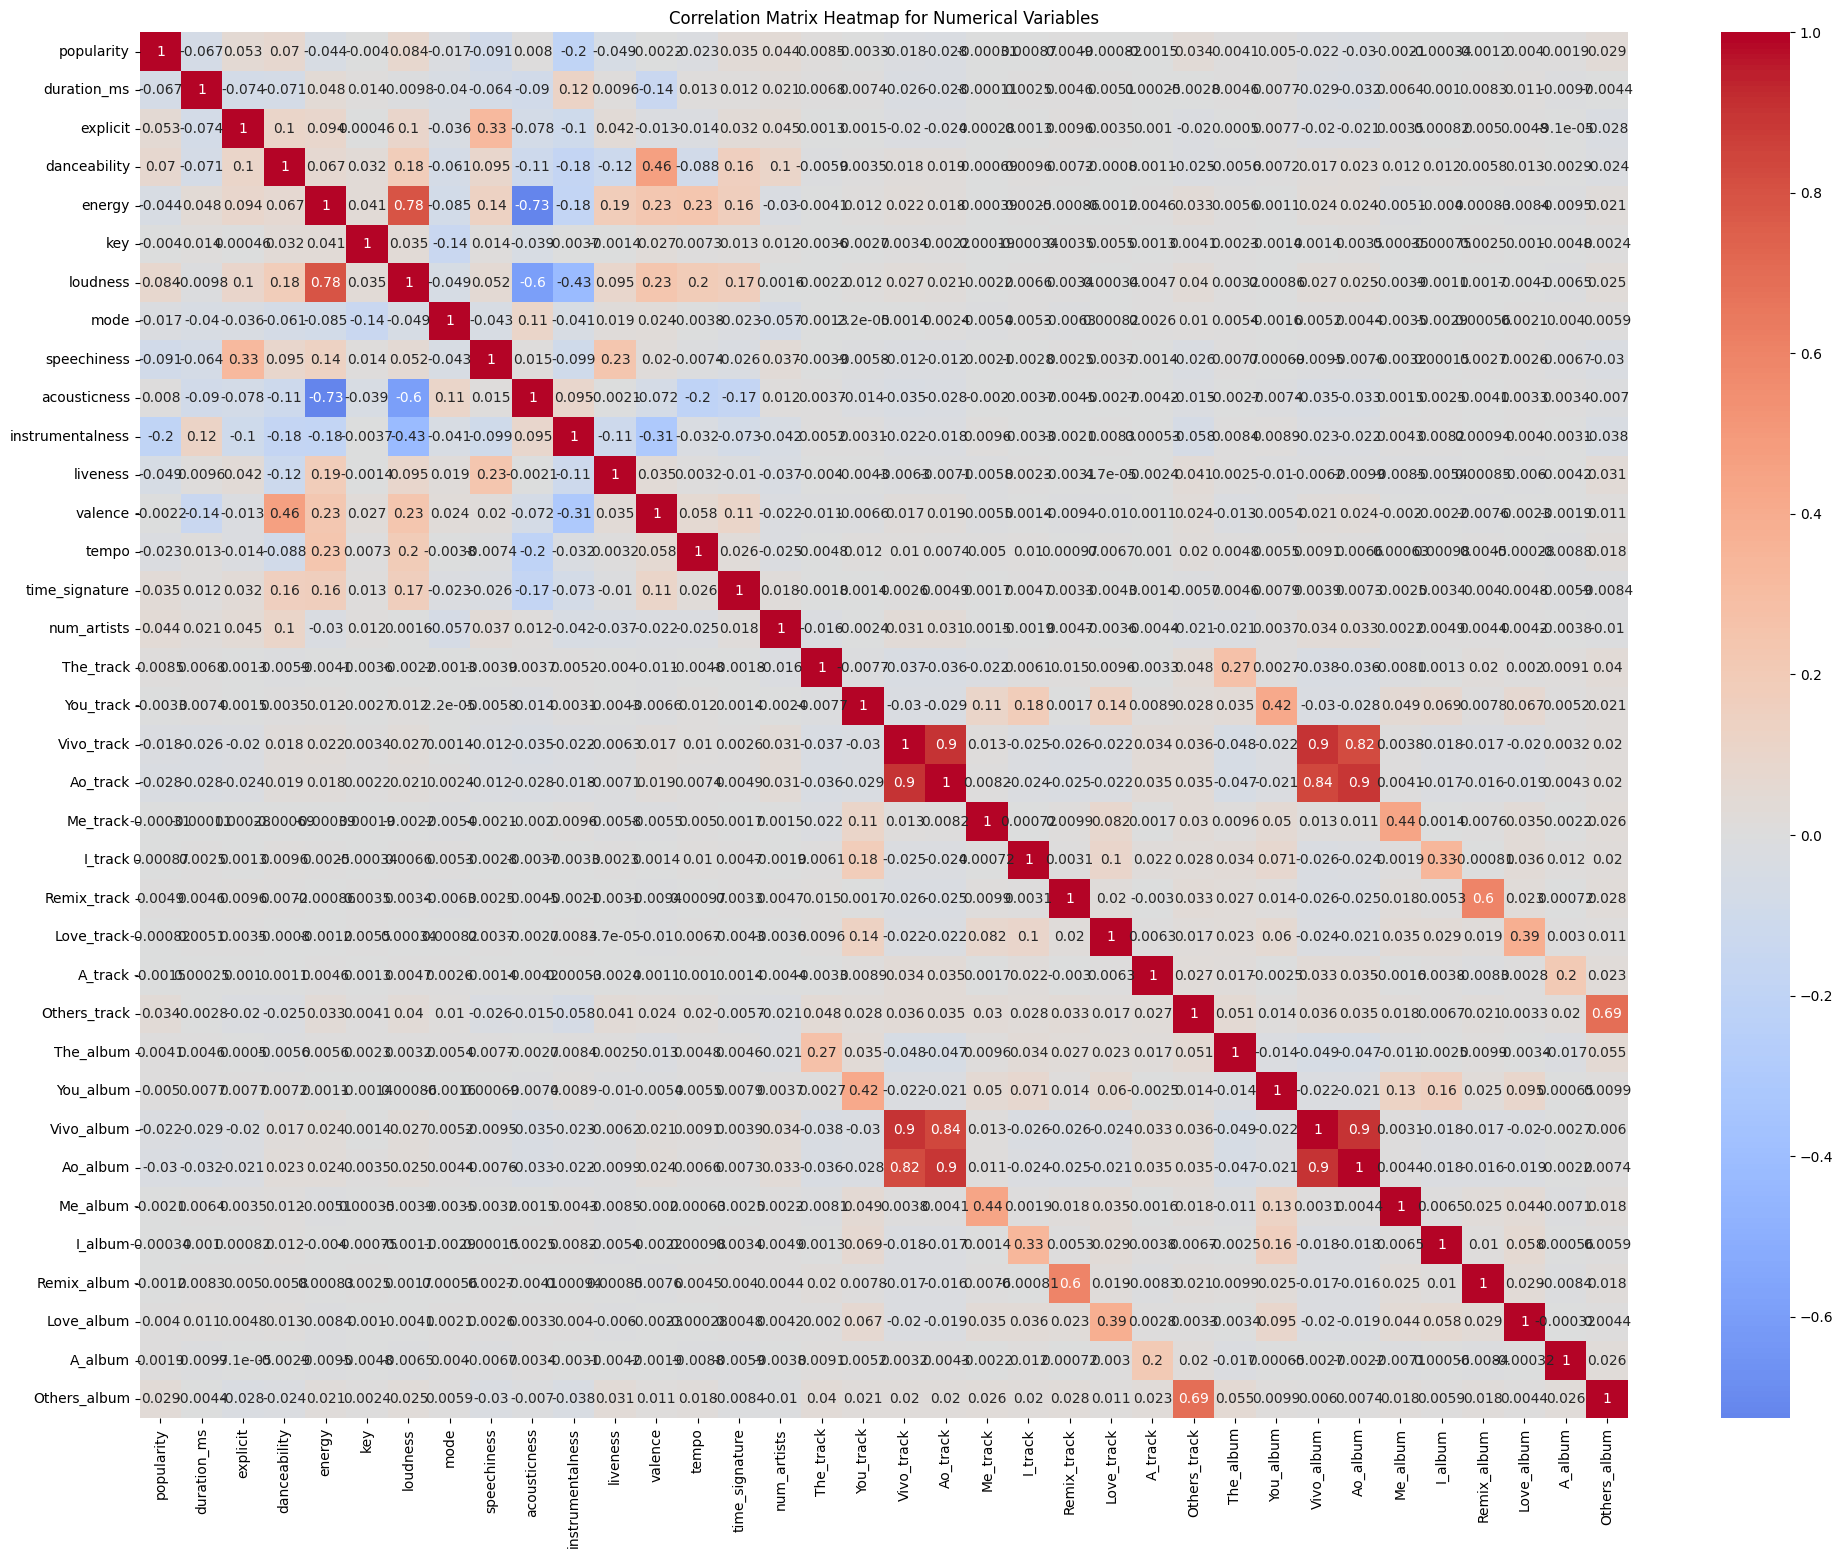

In [44]:
plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap for Numerical Variables')
plt.show()

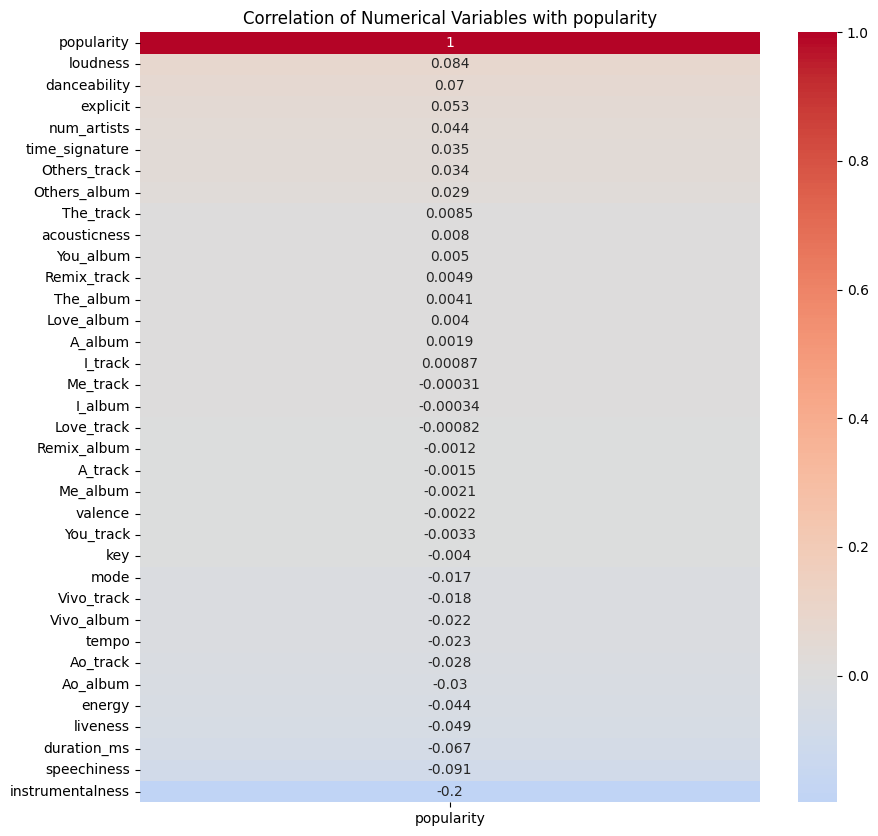

In [45]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix[['popularity']].sort_values(by='popularity', ascending=False), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Numerical Variables with popularity')
plt.show()

In [46]:
import numpy as np

# Create a mask to only show the upper triangle of the matrix (since correlation matrix is symmetric)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Apply the mask to the correlation matrix
corr_matrix_masked = correlation_matrix.mask(mask)

In [47]:
# Find pairs of columns with absolute correlation values greater than 0.7
high_corr_pairs = [(col1, col2, corr_matrix_masked.loc[col1, col2])
                   for col1 in correlation_matrix.columns
                   for col2 in correlation_matrix.columns
                   if abs(corr_matrix_masked.loc[col1, col2]) > 0.7]

In [48]:
# Display the pairs of columns and their correlation values
print("Pairs of columns with absolute correlation values greater than 0.7 and their correlation values:")
for col1, col2, corr_value in high_corr_pairs:
    print(f"{col1} and {col2}: {corr_value}")

Pairs of columns with absolute correlation values greater than 0.7 and their correlation values:
loudness and energy: 0.7844652463114815
acousticness and energy: -0.7266249101708596
Ao_track and Vivo_track: 0.9027095661726318
Vivo_album and Vivo_track: 0.9007060671870465
Vivo_album and Ao_track: 0.8373658595631914
Ao_album and Vivo_track: 0.8214040949153818
Ao_album and Ao_track: 0.8976149988140475
Ao_album and Vivo_album: 0.9020290866271344


In [49]:
spotify = spotify.drop(columns=['energy', 'Vivo_album', 'Others_album', 'Ao_album', 'Ao_track'], axis=1)
spotify.shape

(83922, 32)

In [50]:
numerical_cols1 = spotify.select_dtypes(include=['int64', 'float64', 'bool']).columns
categorical_cols1 = spotify.select_dtypes(include=['object']).columns
numerical_cols1, categorical_cols1

(Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'key',
        'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
        'liveness', 'valence', 'tempo', 'time_signature', 'num_artists',
        'The_track', 'You_track', 'Vivo_track', 'Me_track', 'I_track',
        'Remix_track', 'Love_track', 'A_track', 'Others_track', 'The_album',
        'You_album', 'Me_album', 'I_album', 'Remix_album', 'Love_album',
        'A_album'],
       dtype='object'),
 Index(['track_genre'], dtype='object'))

In [51]:
correlation_matrix1 = spotify[numerical_cols1].corr()
correlation_matrix1

popularity  duration_ms  explicit  danceability       key  \
popularity          1.000000    -0.067111  0.052830      0.069551 -0.003951   
duration_ms        -0.067111     1.000000 -0.073611     -0.070948  0.013690   
explicit            0.052830    -0.073611  1.000000      0.104020  0.000464   
danceability        0.069551    -0.070948  0.104020      1.000000  0.031543   
key                -0.003951     0.013690  0.000464      0.031543  1.000000   
loudness            0.084369    -0.009797  0.102315      0.177544  0.035451   
mode               -0.016644    -0.039969 -0.035667     -0.060791 -0.143629   
speechiness        -0.090880    -0.063825  0.325452      0.095418  0.014139   
acousticness        0.007983    -0.090324 -0.078317     -0.110687 -0.039329   
instrumentalness   -0.196929     0.122120 -0.102996     -0.179303 -0.003657   
liveness           -0.048727     0.009645  0.041805     -0.123505 -0.001400   
valence            -0.002210    -0.141450 -0.013289      0.461319  0.027250   
tempo              -0.023320     0.012962 -0.014276     -0.088045  0.007301   
time_signature      0.035141     0.011598  0.031870      0.159513  0.012996   
num_artists         0.044053     0.021239  0.044845      0.103917  0.012311   
The_track           0.008541     0.006814  0.001289     -0.005891 -0.003575   
You_track          -0.003298     0.007358  0.001514      0.003520 -0.002661   
Vivo_track         -0.018456    -0.026150 -0.020496      0.017854  0.003373   
Me_track           -0.000309    -0.000109  0.000281     -0.000686  0.000186   
I_track             0.000866     0.002469  0.001263      0.009569 -0.000337   
Remix_track         0.004884     0.004570  0.009628      0.007181  0.003506   
Love_track         -0.000818     0.005061  0.003455     -0.000799  0.005460   
A_track            -0.001494     0.000249  0.001029      0.001071  0.001265   
Others_track        0.033571    -0.002811 -0.020063     -0.024881  0.004131   
The_album           0.004142     0.004589  0.000496     -0.005628  0.002311   
You_album           0.004996     0.007657  0.007718      0.007214 -0.001363   
Me_album           -0.002122     0.006376  0.003478      0.012351  0.000348   
I_album            -0.000339     0.001044  0.000818      0.012206 -0.000746   
Remix_album        -0.001218     0.008328  0.005009      0.005839  0.002479   
Love_album          0.004037     0.010913  0.004824      0.012629  0.001031   
A_album             0.001850    -0.009742 -0.000091     -0.002914 -0.004763   

                  loudness      mode  speechiness  acousticness  \
popularity        0.084369 -0.016644    -0.090880      0.007983   
duration_ms      -0.009797 -0.039969    -0.063825     -0.090324   
explicit          0.102315 -0.035667     0.325452     -0.078317   
danceability      0.177544 -0.060791     0.095418     -0.110687   
key               0.035451 -0.143629     0.014139     -0.039329   
loudness          1.000000 -0.049495     0.052131     -0.596560   
mode             -0.049495  1.000000    -0.043191      0.105335   
speechiness       0.052131 -0.043191     1.000000      0.014962   
acousticness     -0.596560  0.105335     0.014962      1.000000   
instrumentalness -0.426932 -0.040584    -0.099100      0.095441   
liveness          0.095395  0.018615     0.231254     -0.002051   
valence           0.233518  0.024110     0.020437     -0.071543   
tempo             0.196105 -0.003787    -0.007352     -0.201690   
time_signature    0.166003 -0.023332    -0.025630     -0.174622   
num_artists       0.001641 -0.056643     0.036747      0.011877   
The_track        -0.002211 -0.001280    -0.003935      0.003656   
You_track         0.012417  0.000022    -0.005831     -0.014495   
Vivo_track        0.026796  0.001450    -0.012243     -0.035155   
Me_track         -0.002234 -0.005382    -0.002125     -0.001993   
I_track           0.006639  0.005275    -0.002802     -0.003696   
Remix_track       0.003378 -0.006289     0.002462     -0.004533   
Love_track     

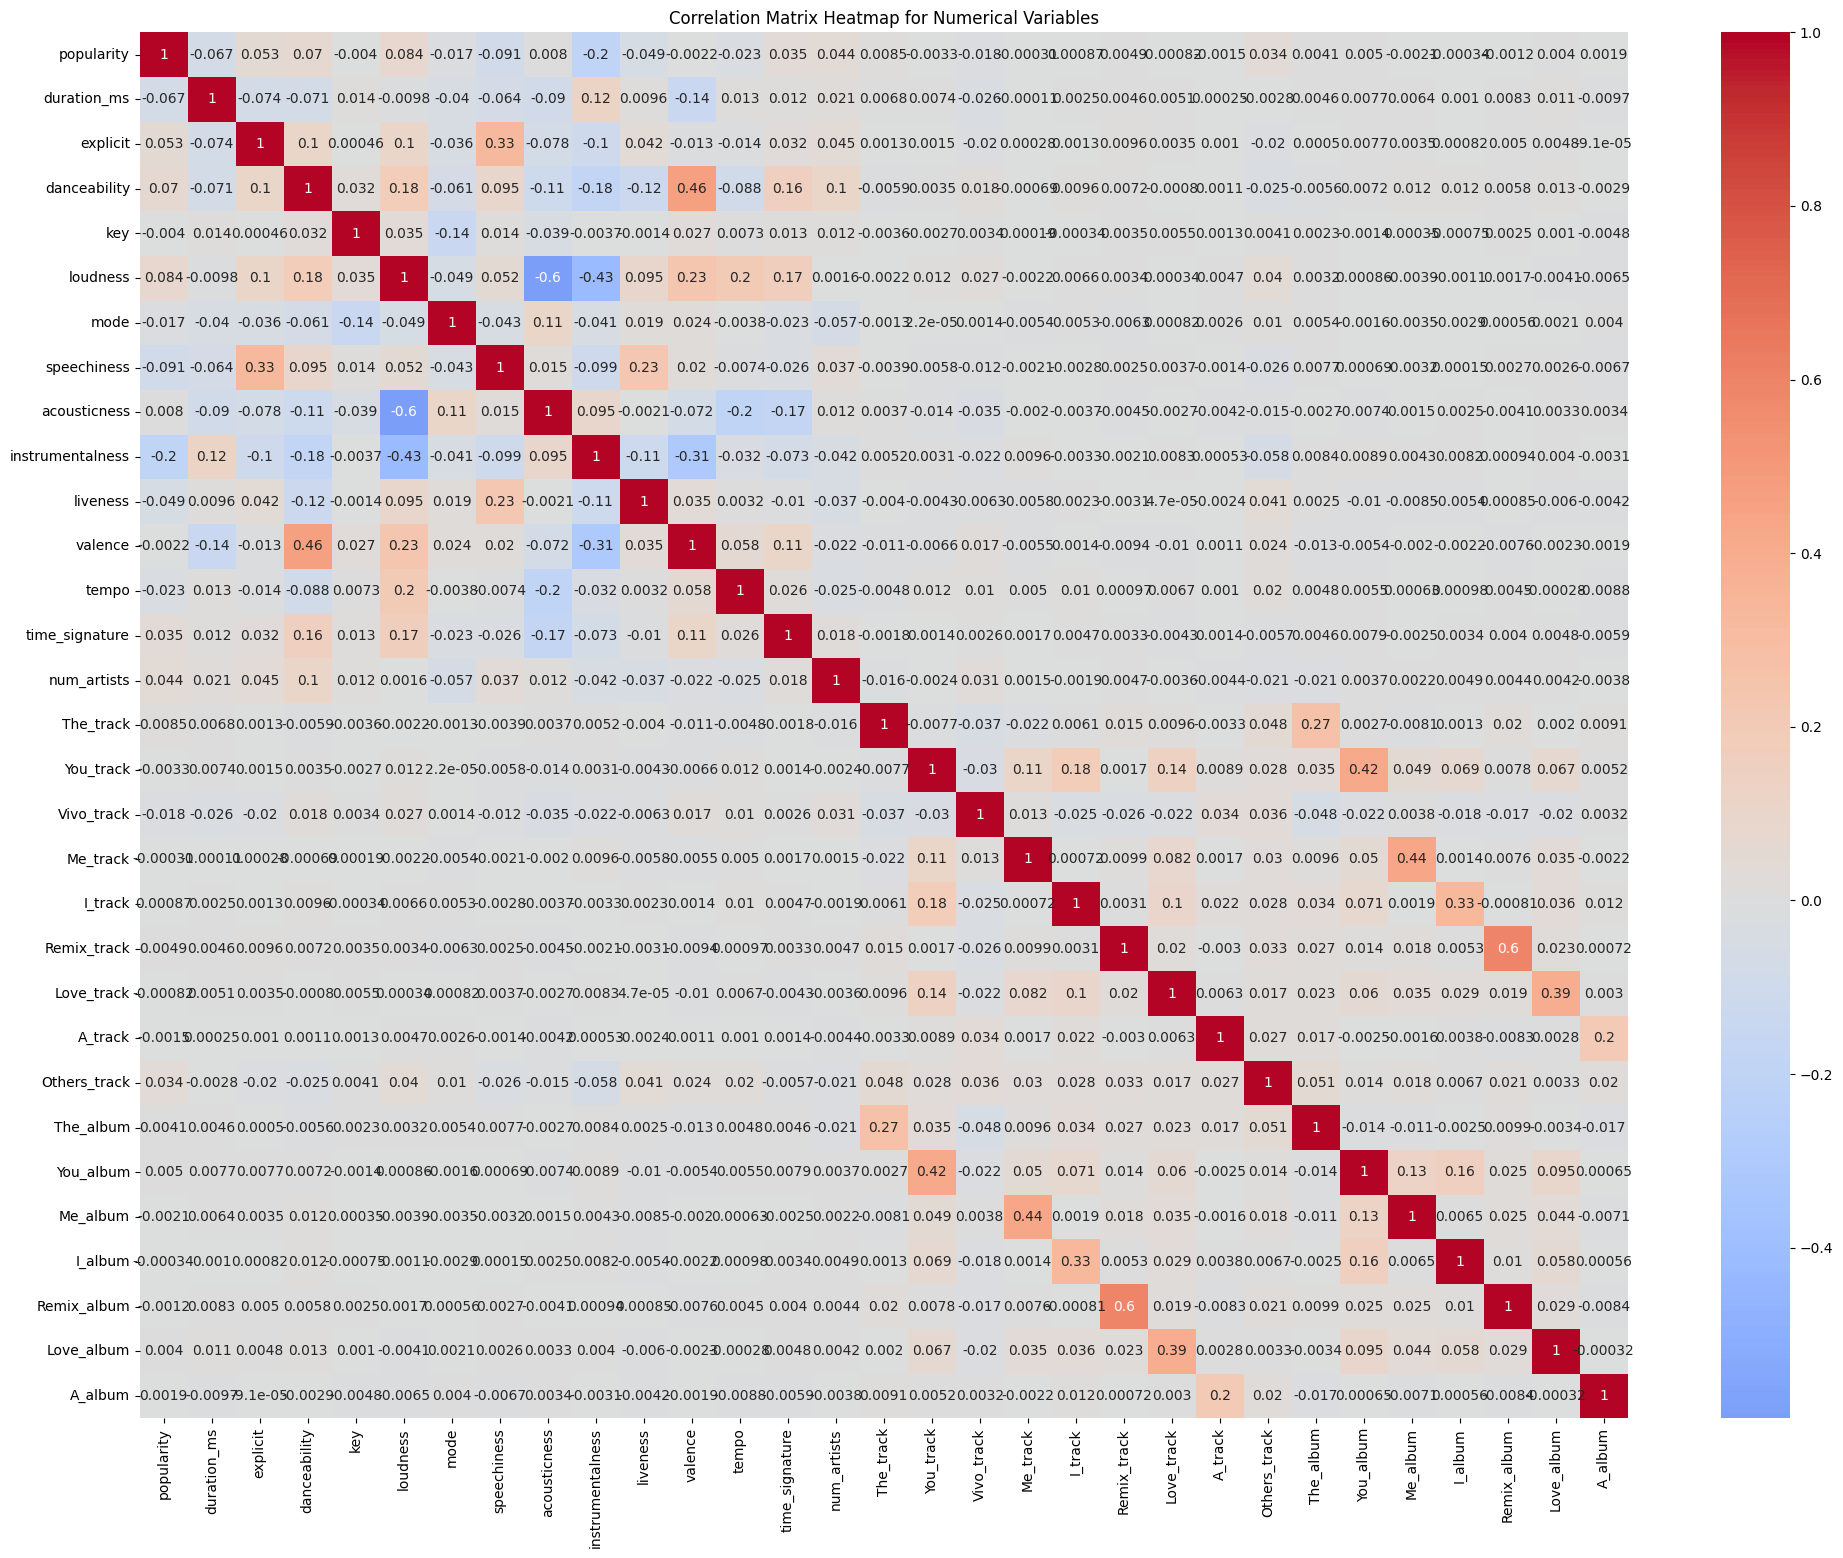

In [52]:
plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap for Numerical Variables')
plt.show()

In [53]:
spotify.nunique()

popularity            100
duration_ms         43720
explicit                2
danceability         1078
key                    12
loudness            17680
mode                    2
speechiness          1471
acousticness         5017
instrumentalness     5292
liveness             1714
valence              1650
tempo               39230
time_signature          5
track_genre            98
num_artists            23
The_track               2
You_track               2
Vivo_track              2
Me_track                2
I_track                 2
Remix_track             2
Love_track              2
A_track                 2
Others_track            2
The_album               2
You_album               2
Me_album                2
I_album                 2
Remix_album             2
Love_album              2
A_album                 2
dtype: int64

In [54]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(spotify['explicit'], spotify['track_genre'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi-square statistic: 15189.722368431303
P-value: 0.0
Degrees of freedom: 97


In [167]:
#spotify_final = spotify1.copy()

In [55]:
spotify.shape

(83922, 32)

In [56]:
# Define the bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [57]:
# Bin the 'popularity' values
spotify['popularity_bin'] = pd.cut(spotify['popularity'], bins=bins, labels=labels, right=False)
spotify.shape

(83922, 33)

In [58]:
spotify = spotify.drop(columns=['popularity'], axis=1)
spotify.head()

duration_ms  explicit  danceability  key  loudness  mode  speechiness  \
0       230666     False         0.676    1    -6.746     0       0.1430   
1       149610     False         0.420    1   -17.235     1       0.0763   
2       210826     False         0.438    0    -9.734     1       0.0557   
3       201933     False         0.266    0   -18.515     1       0.0363   
4       198853     False         0.618    2    -9.681     1       0.0526   

   acousticness  instrumentalness  liveness  ...  A_track  Others_track  \
0        0.0322          0.000001    0.3580  ...    False          True   
1        0.9240          0.000006    0.1010  ...    False          True   
2        0.2100          0.000000    0.1170  ...    False          True   
3        0.9050          0.000071    0.1320  ...    False          True   
4        0.4690          0.000000    0.0829  ...    False          True   

   The_album You_album  Me_album  I_album  Remix_album  Love_album  A_album  \
0      False     False     False    False        False       False    False   
1      False     False     False    False        False       False    False   
2      False     False     False    False        False       False    False   
3      False     False     False    False        False       False    False   
4      False     False     False    False        False       False    False   

   popularity_bin  
0               7  
1               5  
2               5  
3               7  
4               8  

[5 rows x 32 columns]

In [59]:
spotify.isnull().sum().sort_values(ascending=False)

popularity_bin      2
explicit            0
A_album             0
Love_album          0
Remix_album         0
I_album             0
Me_album            0
You_album           0
The_album           0
Others_track        0
A_track             0
Love_track          0
Remix_track         0
I_track             0
Me_track            0
Vivo_track          0
duration_ms         0
The_track           0
num_artists         0
track_genre         0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
mode                0
loudness            0
key                 0
danceability        0
You_track           0
dtype: int64

In [60]:
spotify.dropna(inplace=True)
print(spotify.shape)
print(spotify.isnull().sum().sort_values(ascending=False))

(83920, 32)
duration_ms         0
explicit            0
A_album             0
Love_album          0
Remix_album         0
I_album             0
Me_album            0
You_album           0
The_album           0
Others_track        0
A_track             0
Love_track          0
Remix_track         0
I_track             0
Me_track            0
Vivo_track          0
You_track           0
The_track           0
num_artists         0
track_genre         0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
mode                0
loudness            0
key                 0
danceability        0
popularity_bin      0
dtype: int64


# Base Model

In [61]:
# Apply one-hot encoding to 'track_genre' and 'explicit'
spotify_encoded = pd.get_dummies(spotify, columns=['track_genre', 'explicit'], drop_first=True)

# Display the first few rows of the encoded DataFrame
spotify_encoded.head()

duration_ms  danceability  key  loudness  mode  speechiness  acousticness  \
0       230666         0.676    1    -6.746     0       0.1430        0.0322   
1       149610         0.420    1   -17.235     1       0.0763        0.9240   
2       210826         0.438    0    -9.734     1       0.0557        0.2100   
3       201933         0.266    0   -18.515     1       0.0363        0.9050   
4       198853         0.618    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence  ...  track_genre_reggaeton  \
0          0.000001    0.3580    0.715  ...                  False   
1          0.000006    0.1010    0.267  ...                  False   
2          0.000000    0.1170    0.120  ...                  False   
3          0.000071    0.1320    0.143  ...                  False   
4          0.000000    0.0829    0.167  ...                  False   

   track_genre_rock  track_genre_rock-n-roll  track_genre_rockabilly  \
0             False                    False                   False   
1             False                    False                   False   
2             False                    False                   False   
3             False                    False                   False   
4             False                    False                   False   

   track_genre_romance  track_genre_sad  track_genre_salsa  track_genre_samba  \
0                False            False              False              False   
1                False            False              False              False   
2                False            False              False              False   
3                False            False              False              False   
4                False            False              False              False   

   track_genre_sertanejo  explicit_True  
0                  False          False  
1                  False          False  
2                  False          False  
3                  False          False  
4                  False          False  

[5 rows x 128 columns]

In [62]:
spotify_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83920 entries, 0 to 97979
Columns: 128 entries, duration_ms to explicit_True
dtypes: bool(114), category(1), float64(8), int64(5)
memory usage: 18.2 MB


In [143]:
# Define the target variable and features
target = 'popularity_bin'
features = spotify_encoded.drop(columns=[target]).columns

In [144]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spotify_encoded[features],
                                                    spotify_encoded[target],
                                                    test_size=0.2,
                                                    random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(67136, 127) (67136,)
(16784, 127) (16784,)


In [65]:
'''
# Sample 30% of the training data
X_train_sample = X_train.sample(frac=0.4, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Sample 30% of the testing data
X_test_sample = X_test.sample(frac=0.4, random_state=42)
y_test_sample = y_test.loc[X_test_sample.index]

print("Sampled Training Data:")
print(X_train_sample.shape, y_train_sample.shape)

print("\nSampled Testing Data:")
print(X_test_sample.shape, y_test_sample.shape)
'''

'\n# Sample 30% of the training data\nX_train_sample = X_train.sample(frac=0.4, random_state=42)\ny_train_sample = y_train.loc[X_train_sample.index]\n\n# Sample 30% of the testing data\nX_test_sample = X_test.sample(frac=0.4, random_state=42)\ny_test_sample = y_test.loc[X_test_sample.index]\n\nprint("Sampled Training Data:")\nprint(X_train_sample.shape, y_train_sample.shape)\n\nprint("\nSampled Testing Data:")\nprint(X_test_sample.shape, y_test_sample.shape)\n'

In [66]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train_sample, y_train_sample)
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score\n\n# Create a Random Forest Classifier\nrf_classifier = RandomForestClassifier(random_state=42)\n\n# Fit the model to the training data\nrf_classifier.fit(X_train_sample, y_train_sample)\n'

In [145]:
spotify_encoded.columns

Index(['duration_ms', 'danceability', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence',
       ...
       'track_genre_reggaeton', 'track_genre_rock', 'track_genre_rock-n-roll',
       'track_genre_rockabilly', 'track_genre_romance', 'track_genre_sad',
       'track_genre_salsa', 'track_genre_samba', 'track_genre_sertanejo',
       'explicit_True'],
      dtype='object', length=128)

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [140]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- explicit
- track_genre
Feature names seen at fit time, yet now missing:
- explicit_True
- track_genre_afrobeat
- track_genre_alt-rock
- track_genre_alternative
- track_genre_ambient
- ...


In [70]:
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Accuracy: 0.5647044804575786
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66      1221
           1       0.63      0.67      0.65      1650
           2       0.63      0.76      0.69      3236
           3       0.52      0.45      0.48      2297
           4       0.59      0.60      0.60      3257
           5       0.45      0.49      0.47      2550
           6       0.47      0.38      0.42      1617
           7       0.50      0.31      0.38       726
           8       0.44      0.13      0.21       208
           9       0.00      0.00      0.00        22

    accuracy                           0.56     16784
   macro avg       0.49      0.45      0.46     16784
weighted avg       0.56      0.56      0.56     16784



In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score:", kappa)

In [71]:
# Select columns ending with '_album' or '_track'
columns_to_transform = [col for col in spotify.columns if col.endswith(('_album', '_track'))]

# Convert these columns to boolean type
spotify[columns_to_transform] = spotify[columns_to_transform].astype(bool)

# Display the updated DataFrame
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83920 entries, 0 to 97979
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   duration_ms       83920 non-null  int64   
 1   explicit          83920 non-null  bool    
 2   danceability      83920 non-null  float64 
 3   key               83920 non-null  int64   
 4   loudness          83920 non-null  float64 
 5   mode              83920 non-null  int64   
 6   speechiness       83920 non-null  float64 
 7   acousticness      83920 non-null  float64 
 8   instrumentalness  83920 non-null  float64 
 9   liveness          83920 non-null  float64 
 10  valence           83920 non-null  float64 
 11  tempo             83920 non-null  float64 
 12  time_signature    83920 non-null  int64   
 13  track_genre       83920 non-null  object  
 14  num_artists       83920 non-null  int64   
 15  The_track         83920 non-null  bool    
 16  You_track         83920 non

In [72]:
# Define the target variable and features
target = 'popularity_bin'
features = spotify.drop(columns=[target]).columns

In [73]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spotify[features],
                                                    spotify[target],
                                                    test_size=0.2,
                                                    random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(67136, 31) (67136,)
(16784, 31) (16784,)


In [74]:
feature_names = X_train.columns
feature_names

Index(['duration_ms', 'explicit', 'danceability', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'num_artists',
       'The_track', 'You_track', 'Vivo_track', 'Me_track', 'I_track',
       'Remix_track', 'Love_track', 'A_track', 'Others_track', 'The_album',
       'You_album', 'Me_album', 'I_album', 'Remix_album', 'Love_album',
       'A_album'],
      dtype='object')

In [75]:
X_train.dtypes

duration_ms           int64
explicit               bool
danceability        float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
num_artists           int64
The_track              bool
You_track              bool
Vivo_track             bool
Me_track               bool
I_track                bool
Remix_track            bool
Love_track             bool
A_track                bool
Others_track           bool
The_album              bool
You_album              bool
Me_album               bool
I_album                bool
Remix_album            bool
Love_album             bool
A_album                bool
dtype: object

In [76]:
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64', 'bool']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols, categorical_cols

(Index(['duration_ms', 'explicit', 'danceability', 'key', 'loudness', 'mode',
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'time_signature', 'num_artists', 'The_track',
        'You_track', 'Vivo_track', 'Me_track', 'I_track', 'Remix_track',
        'Love_track', 'A_track', 'Others_track', 'The_album', 'You_album',
        'Me_album', 'I_album', 'Remix_album', 'Love_album', 'A_album'],
       dtype='object'),
 Index(['track_genre'], dtype='object'))

# Buildig the Pipeline

In [77]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder())
])

In [78]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [100]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [101]:
# Define the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'XGBoost Classifier': XGBClassifier(random_state=42)
}

### Random Forest Classifier

In [80]:
from sklearn.pipeline import Pipeline

# Create a pipeline that includes preprocessing and model
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [81]:
# Train the model
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['duration_ms', 'explicit', 'danceability', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'num_artists', 'The_trac...
       'Love_track', 'A_track', 'Others_track', 'The_album', 'You_album',
       'Me_album', 'I_album', 'Remix_album', 'Love_album', 'A_album'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['track_genre'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [82]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
scores = cross_val_score(model_rf, X_train, y_train, cv=3)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.55056079 0.55350999 0.5475467 ]
Average cross-validation score: 0.5505391594306813


In [83]:
y_pred = model_rf.predict(X_test)

In [84]:
# Evaluate the model
accuracy = model_rf.score(X_test, y_test)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.5656577693040992


In [85]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.5576049121760948


In [87]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65      1221
           1       0.63      0.67      0.65      1650
           2       0.63      0.76      0.69      3236
           3       0.53      0.45      0.49      2297
           4       0.60      0.60      0.60      3257
           5       0.46      0.49      0.47      2550
           6       0.47      0.37      0.41      1617
           7       0.45      0.30      0.36       726
           8       0.49      0.16      0.24       208
           9       0.00      0.00      0.00        22

    accuracy                           0.57     16784
   macro avg       0.49      0.45      0.46     16784
weighted avg       0.56      0.57      0.56     16784



### Gradient Boosting Classifier

In [103]:
model_gb = Pipeline(steps=[('preprocessor', preprocessor),
                ('classifier', GradientBoostingClassifier())])

In [106]:
# Train the model
model_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['duration_ms', 'explicit', 'danceability', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'num_artists', 'The_track',
       'You_track', 'Vivo_track', 'Me_track', 'I_track', 'Remix_track',
       'Love_track', 'A_track', 'Others_track', 'The_album', 'You_album',
       'Me_album', 'I_album', 'Remix_album', 'Love_album', 'A_album'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['track_genre'], dtype='object'))])),
                ('classifier', GradientBoostingClassifier())])

In [107]:
# Perform cross-validation
scores = cross_val_score(model_gb, X_train, y_train, cv=3)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.50936145 0.51092542 0.50420055]
Average cross-validation score: 0.5081624767349467


In [108]:
y_pred = model_gb.predict(X_test)

In [109]:
# Evaluate the model
accuracy = model_gb.score(X_test, y_test)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.5120948522402288


In [110]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.5028524043869207


In [111]:
from sklearn.metrics import classification_report

gb_report = classification_report(y_test, y_pred)
print("Classification Report:\n", gb_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.57      0.55      1221
           1       0.63      0.65      0.64      1650
           2       0.63      0.70      0.67      3236
           3       0.48      0.42      0.45      2297
           4       0.52      0.56      0.54      3257
           5       0.39      0.47      0.43      2550
           6       0.38      0.25      0.30      1617
           7       0.34      0.17      0.23       726
           8       0.19      0.10      0.13       208
           9       0.00      0.00      0.00        22

    accuracy                           0.51     16784
   macro avg       0.41      0.39      0.39     16784
weighted avg       0.50      0.51      0.50     16784



### Decision Tree Classifier

In [112]:
model_dt = Pipeline(steps=[('preprocessor', preprocessor),
                ('classifier', DecisionTreeClassifier())])

In [114]:
# Train the model
model_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['duration_ms', 'explicit', 'danceability', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'num_artists', 'The_track',
       'You_track', 'Vivo_track', 'Me_track', 'I_track', 'Remix_track',
       'Love_track', 'A_track', 'Others_track', 'The_album', 'You_album',
       'Me_album', 'I_album', 'Remix_album', 'Love_album', 'A_album'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['track_genre'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

In [115]:
# Perform cross-validation
scores = cross_val_score(model_dt, X_train, y_train, cv=3)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.41905358 0.41717682 0.41616766]
Average cross-validation score: 0.4174660197456644


In [116]:
y_pred = model_dt.predict(X_test)

In [117]:
# Evaluate the model
accuracy = model_dt.score(X_test, y_test)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.43583174451858914


In [118]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.43571213758419625


In [119]:
from sklearn.metrics import classification_report

dt_report = classification_report(y_test, y_pred)
print("Classification Report:\n", dt_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.57      0.54      1221
           1       0.52      0.53      0.52      1650
           2       0.59      0.56      0.57      3236
           3       0.36      0.35      0.36      2297
           4       0.47      0.48      0.47      3257
           5       0.34      0.36      0.35      2550
           6       0.30      0.29      0.29      1617
           7       0.22      0.23      0.23       726
           8       0.14      0.14      0.14       208
           9       0.00      0.00      0.00        22

    accuracy                           0.44     16784
   macro avg       0.35      0.35      0.35     16784
weighted avg       0.44      0.44      0.44     16784



### XGBoost Classifier

In [88]:
from xgboost import XGBClassifier

# Create a pipeline that includes preprocessing and model
model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Train the model
model_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['duration_ms', 'explicit', 'danceability', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'num_artists', 'The_trac...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [89]:
# Perform cross-validation
scores = cross_val_score(model_xgb, X_train, y_train, cv=3)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.51762813 0.52214129 0.5209134 ]
Average cross-validation score: 0.520227607927031


In [90]:
y_pred = model_xgb.predict(X_test)

In [91]:
# Evaluate the model
accuracy = model_xgb.score(X_test, y_test)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.5306244041944709


In [92]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.5212107354458132


In [95]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.60      0.59      1221
           1       0.62      0.68      0.65      1650
           2       0.62      0.75      0.68      3236
           3       0.50      0.43      0.46      2297
           4       0.55      0.56      0.55      3257
           5       0.41      0.47      0.43      2550
           6       0.40      0.27      0.32      1617
           7       0.40      0.23      0.29       726
           8       0.44      0.18      0.25       208
           9       0.89      0.36      0.52        22

    accuracy                           0.53     16784
   macro avg       0.54      0.45      0.47     16784
weighted avg       0.52      0.53      0.52     16784



# Hyperparameter Tuning

In [104]:
! pip -q install optuna

In [105]:
!pip install --upgrade optuna optuna-integration

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 1.9 MB/s eta 0:00:00


In [120]:
import optuna

In [138]:
# Define the objective function for Optuna
def objective(trial):
    classifier_name = trial.suggest_categorical('classifier', ['Random Forest', 'XGBoost Classifier'])

    if classifier_name == 'Random Forest':
        classifier = RandomForestClassifier(
            n_estimators=trial.suggest_int('rf_n_estimators', 100, 200),
            max_depth=trial.suggest_int('rf_max_depth', 10, 30),
            min_samples_split=trial.suggest_int('rf_min_samples_split', 2, 10),
            min_samples_leaf=trial.suggest_int('rf_min_samples_leaf', 1, 10)
        )
    elif classifier_name == 'XGBoost Classifier':
        classifier = XGBClassifier(
            n_estimators=trial.suggest_int('n_estimators', 50, 400),
            max_depth=trial.suggest_int('max_depth', 2, 32),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3),
            colsample_bytree=trial.suggest_float('colsample_bytree', 0.1, 1.0),
            subsample=trial.suggest_float('subsample', 0.1, 1.0),
            use_label_encoder=False,
            eval_metric='mlogloss'
        )
    else:
        raise ValueError("Unsupported classifier name")

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Train the pipeline
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    f1_macro = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)

    # Log accuracy
    trial.report(accuracy, step=0)

    return f1_macro

In [139]:
# Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10, n_jobs=-1)

# Print the best trial
print(f'Best trial: {study.best_trial.number}')
print(f'Best value (F1 macro): {study.best_value}')
print('Best hyperparameters:')
for key, value in study.best_trial.params.items():
    print(f'  {key}: {value}')

[I 2024-07-23 19:44:24,196] A new study created in memory with name: no-name-b3b782ee-9861-4fbc-bf22-4ef9a5385993
[I 2024-07-23 19:44:47,269] Trial 1 finished with value: 0.2756195667812228 and parameters: {'classifier': 'Random Forest', 'rf_n_estimators': 109, 'rf_max_depth': 17, 'rf_min_samples_split': 9, 'rf_min_samples_leaf': 3}. Best is trial 1 with value: 0.2756195667812228.
[I 2024-07-23 19:47:29,800] Trial 0 finished with value: 0.3161978909304423 and parameters: {'classifier': 'Random Forest', 'rf_n_estimators': 180, 'rf_max_depth': 24, 'rf_min_samples_split': 5, 'rf_min_samples_leaf': 2}. Best is trial 0 with value: 0.3161978909304423.
[I 2024-07-23 19:47:37,884] Trial 1 finished with value: 0.6015603901473945 and parameters: {'classifier': 'XGBoost Classifier', 'n_estimators': 154, 'max_depth': 19, 'learning_rate': 0.2981595784383207, 'colsample_bytree': 0.3347951285118238, 'subsample': 0.830232129281401}. Best is trial 1 with value: 0.6015603901473945.
[I 2024-07-23 19:47:4

Best trial: 1
Best value (F1 macro): 0.6015603901473945
Best hyperparameters:
  classifier: XGBoost Classifier
  n_estimators: 154
  max_depth: 19
  learning_rate: 0.2981595784383207
  colsample_bytree: 0.3347951285118238
  subsample: 0.830232129281401
